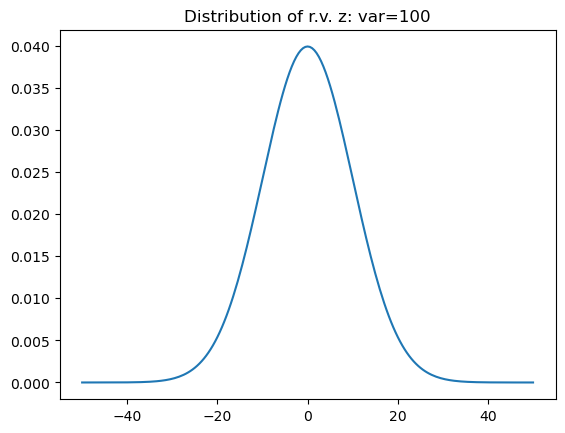

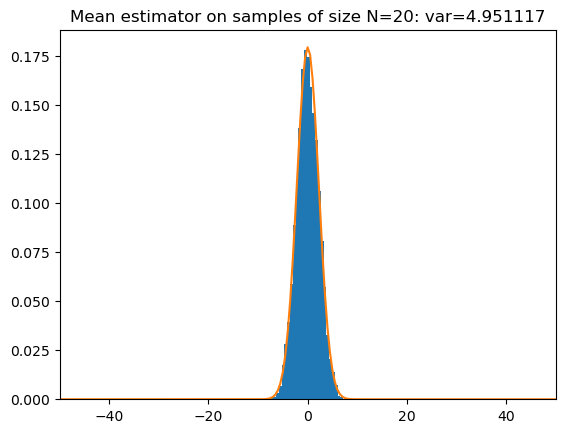

Variance of mu_hat: 4.951117
Theoretical variance: 5.000000


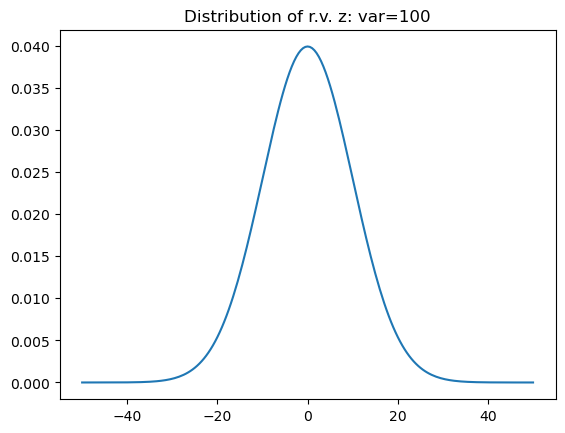

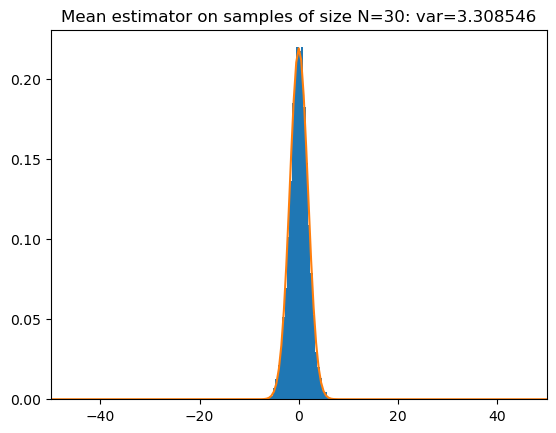

Variance of mu_hat: 3.308546
Theoretical variance: 3.333333


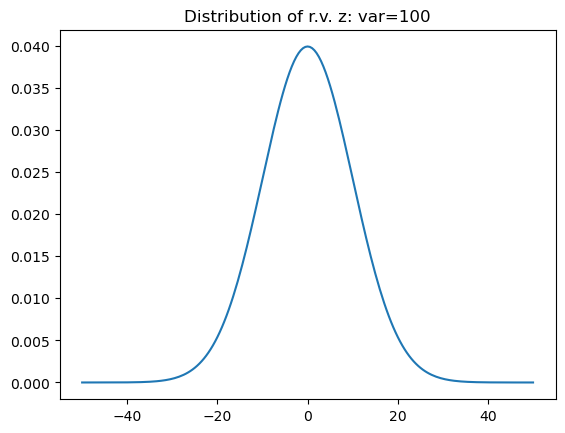

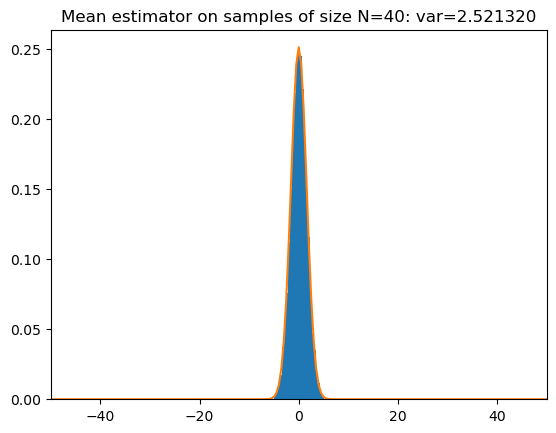

Variance of mu_hat: 2.521320
Theoretical variance: 2.500000


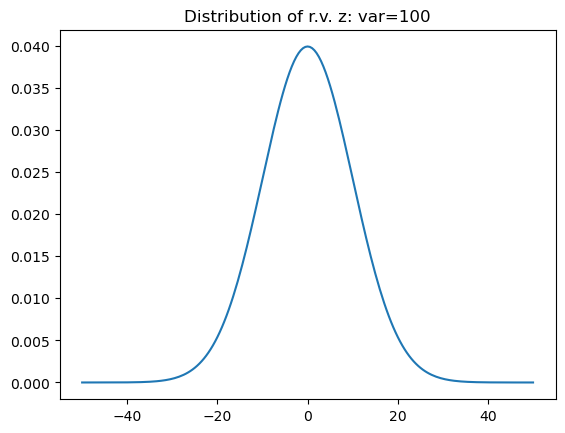

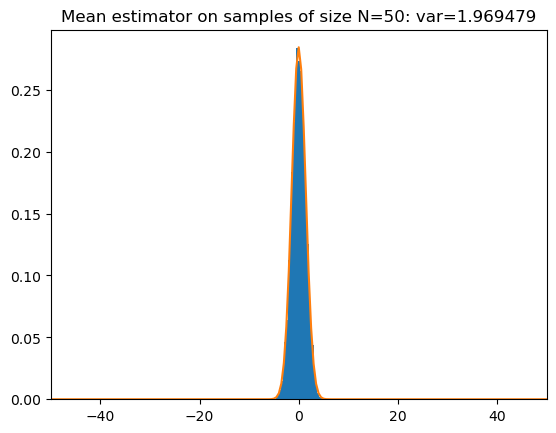

Variance of mu_hat: 1.969479
Theoretical variance: 2.000000


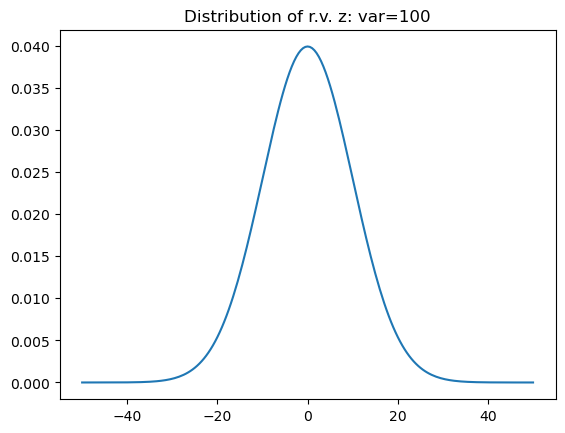

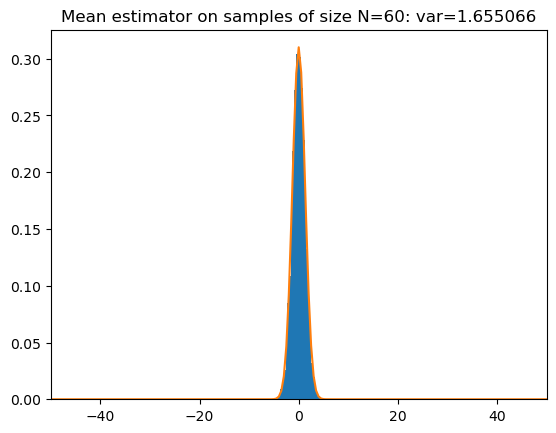

Variance of mu_hat: 1.655066
Theoretical variance: 1.666667


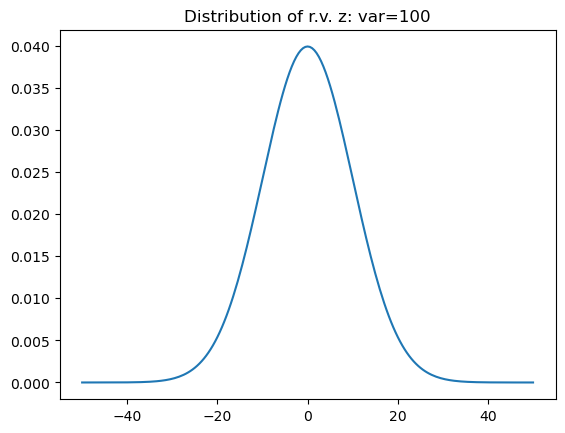

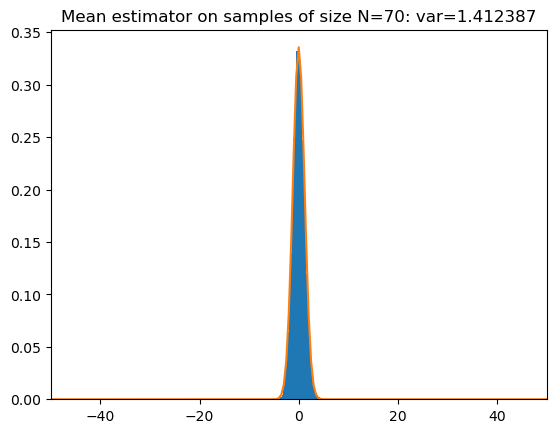

Variance of mu_hat: 1.412387
Theoretical variance: 1.428571


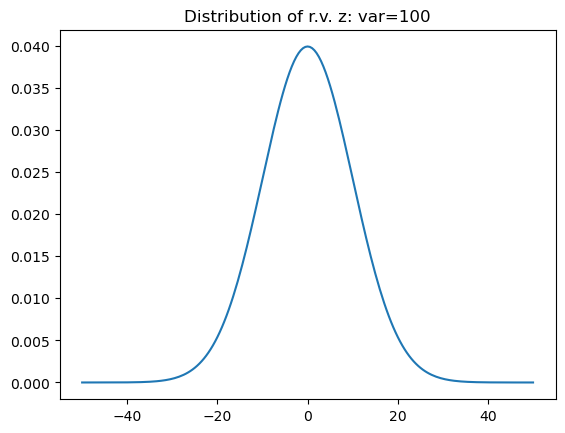

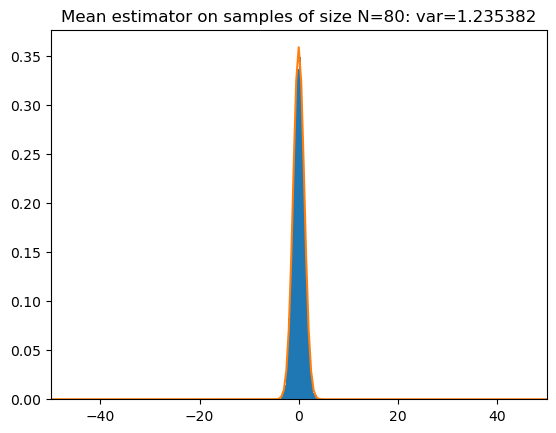

Variance of mu_hat: 1.235382
Theoretical variance: 1.250000


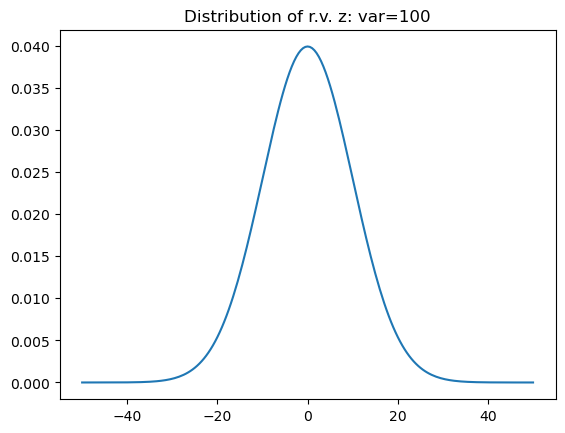

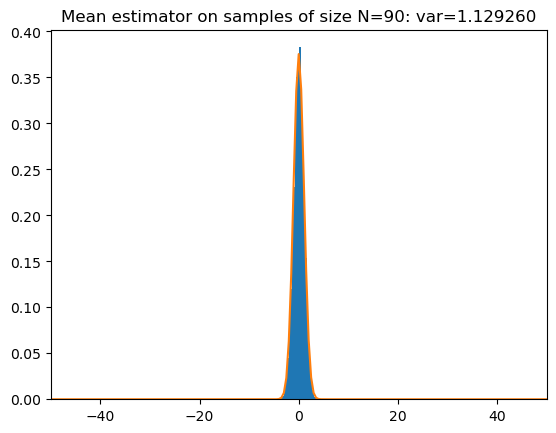

Variance of mu_hat: 1.129260
Theoretical variance: 1.111111


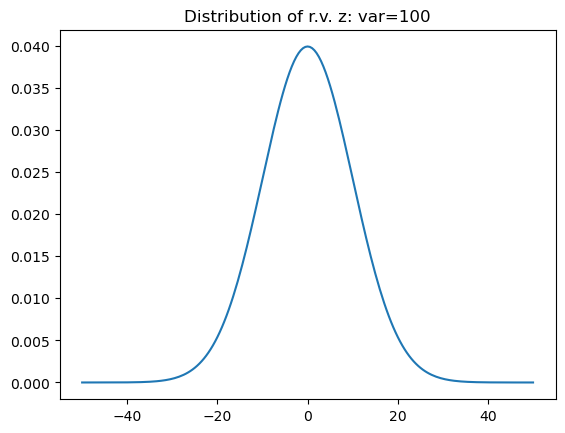

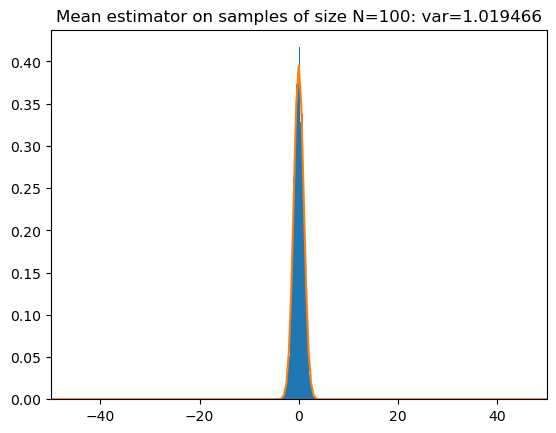

Variance of mu_hat: 1.019466
Theoretical variance: 1.000000


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.ion()  # Turn on interactive mode

for N in range(20, 101, 10):
    mu = 0
    sdev = 10
    R = 10000
    
    I = np.arange(-50, 50.5, 0.5)
    p = norm.pdf(I, loc=mu, scale=sdev)
    
    plt.figure()
    plt.plot(I, p)
    plt.title(f"Distribution of r.v. z: var={sdev**2}")
    plt.show()
    
    mu_hat = np.zeros((R, 1))
    for r in range(R):
        D = np.random.normal(loc=mu, scale=sdev, size=N)
        mu_hat[r, 0] = np.mean(D)
    
    plt.figure()
    plt.hist(mu_hat, density=True, bins=30)
    plt.title(f"Mean estimator on samples of size N={N}: var={np.var(mu_hat):.6f}")
    plt.xlim(min(I), max(I))
    
    p_mu_hat = norm.pdf(I, loc=np.mean(mu_hat), scale=np.sqrt(np.var(mu_hat)))
    plt.plot(I, p_mu_hat)
    plt.show()
    
    print(f"Variance of mu_hat: {np.var(mu_hat):.6f}")
    print(f"Theoretical variance: {sdev**2/N:.6f}")
    
    plt.pause(1)  # Pause to allow time for plot to be displayed

plt.ioff()  # Turn off interactive mode
plt.show()  # Keep the plots open



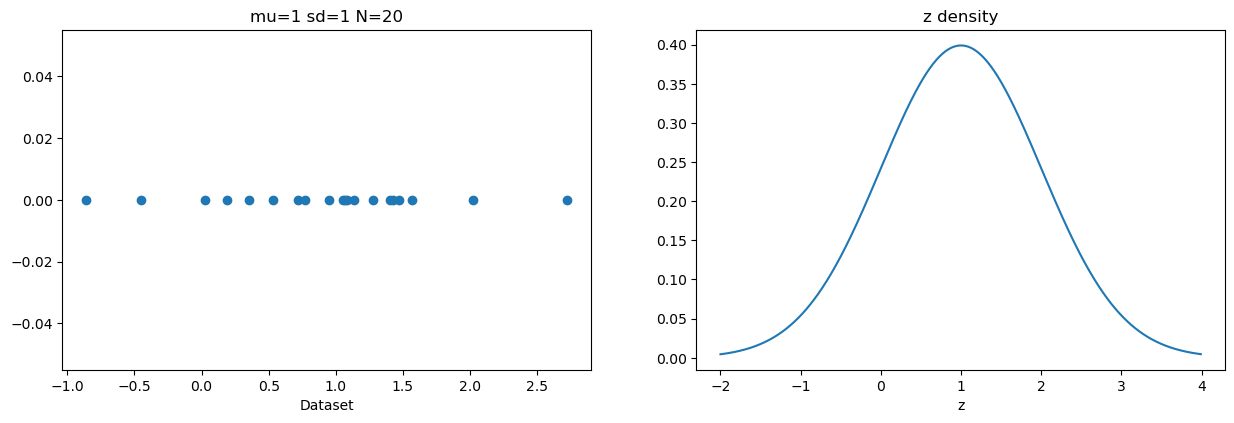

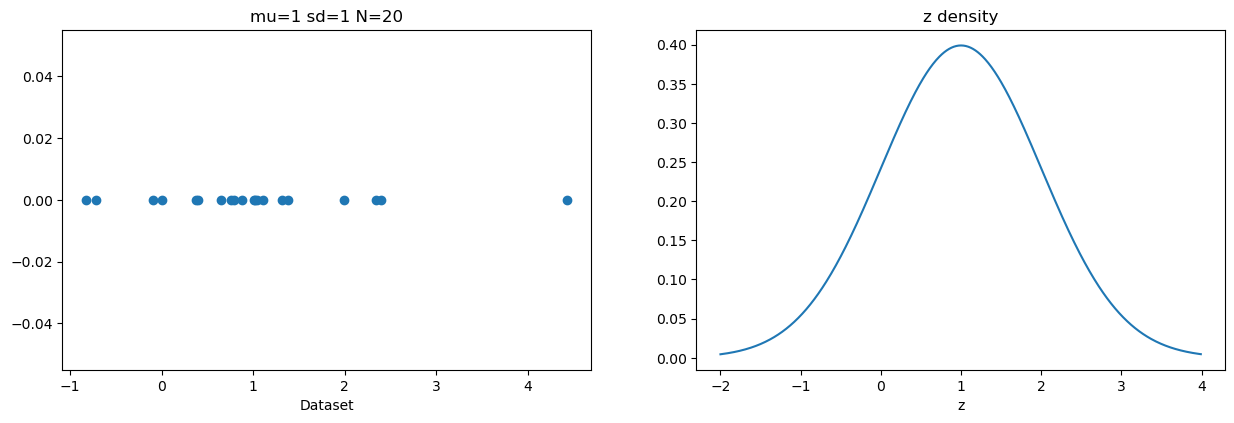

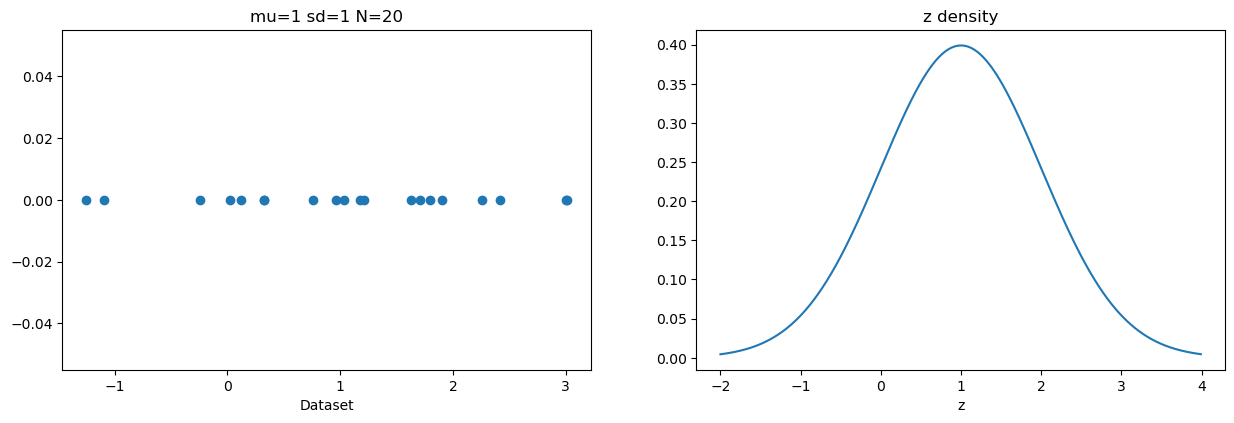

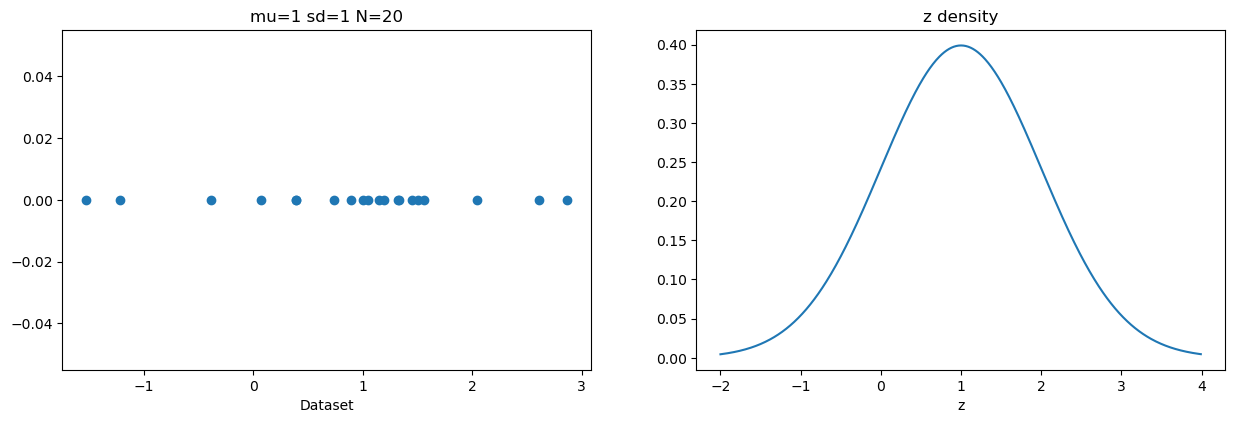

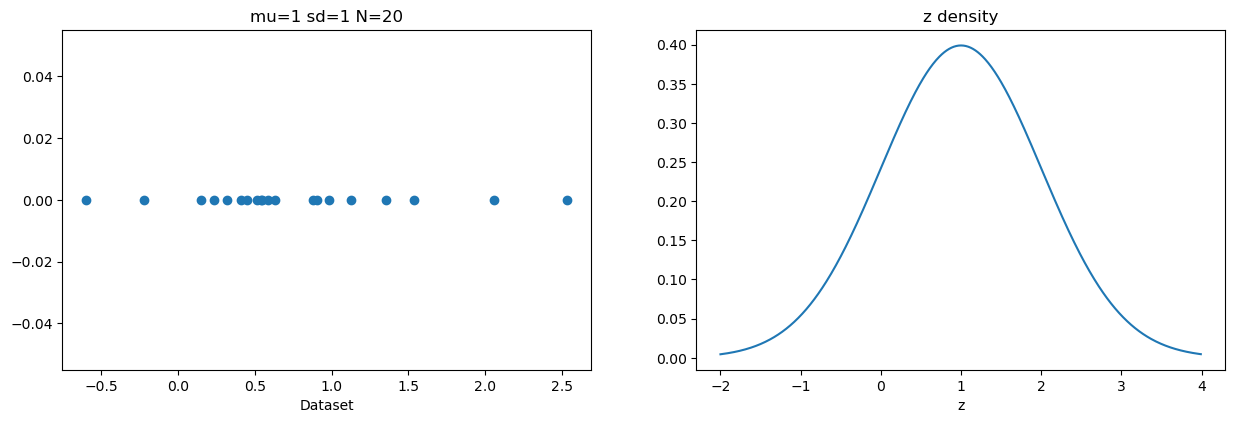

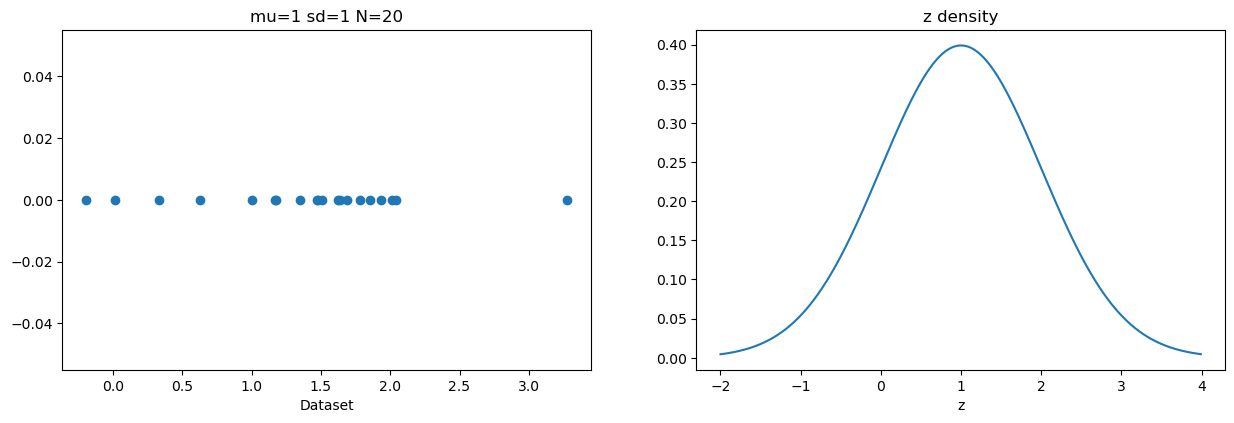

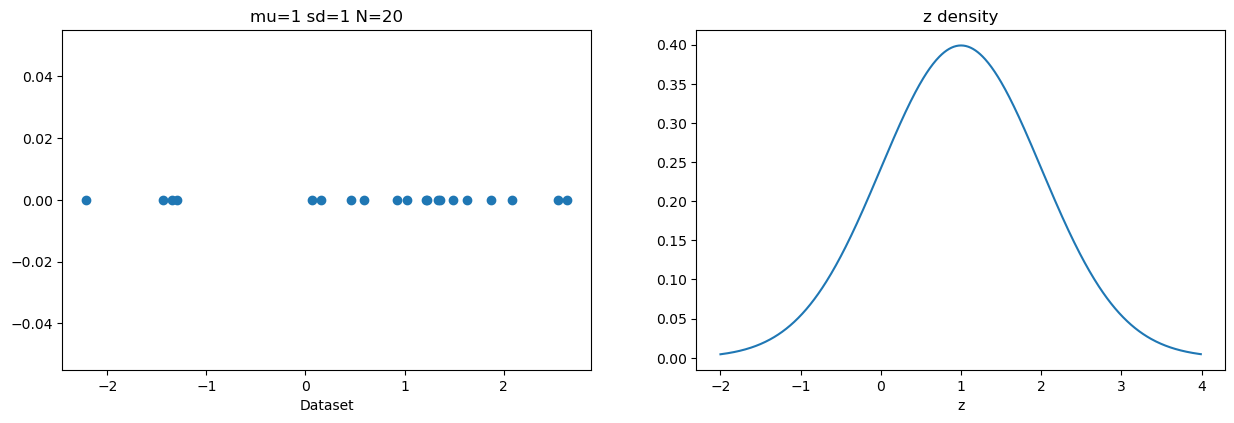

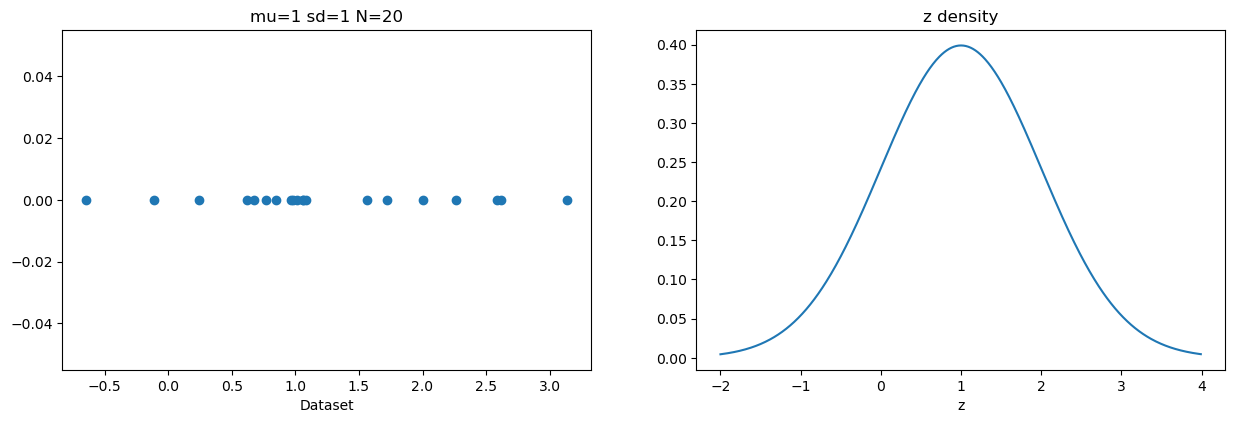

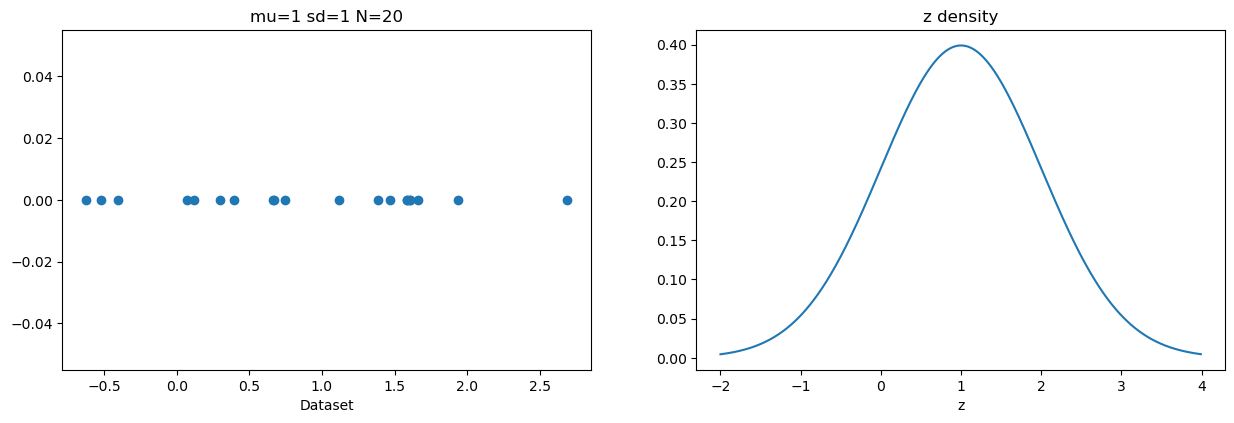

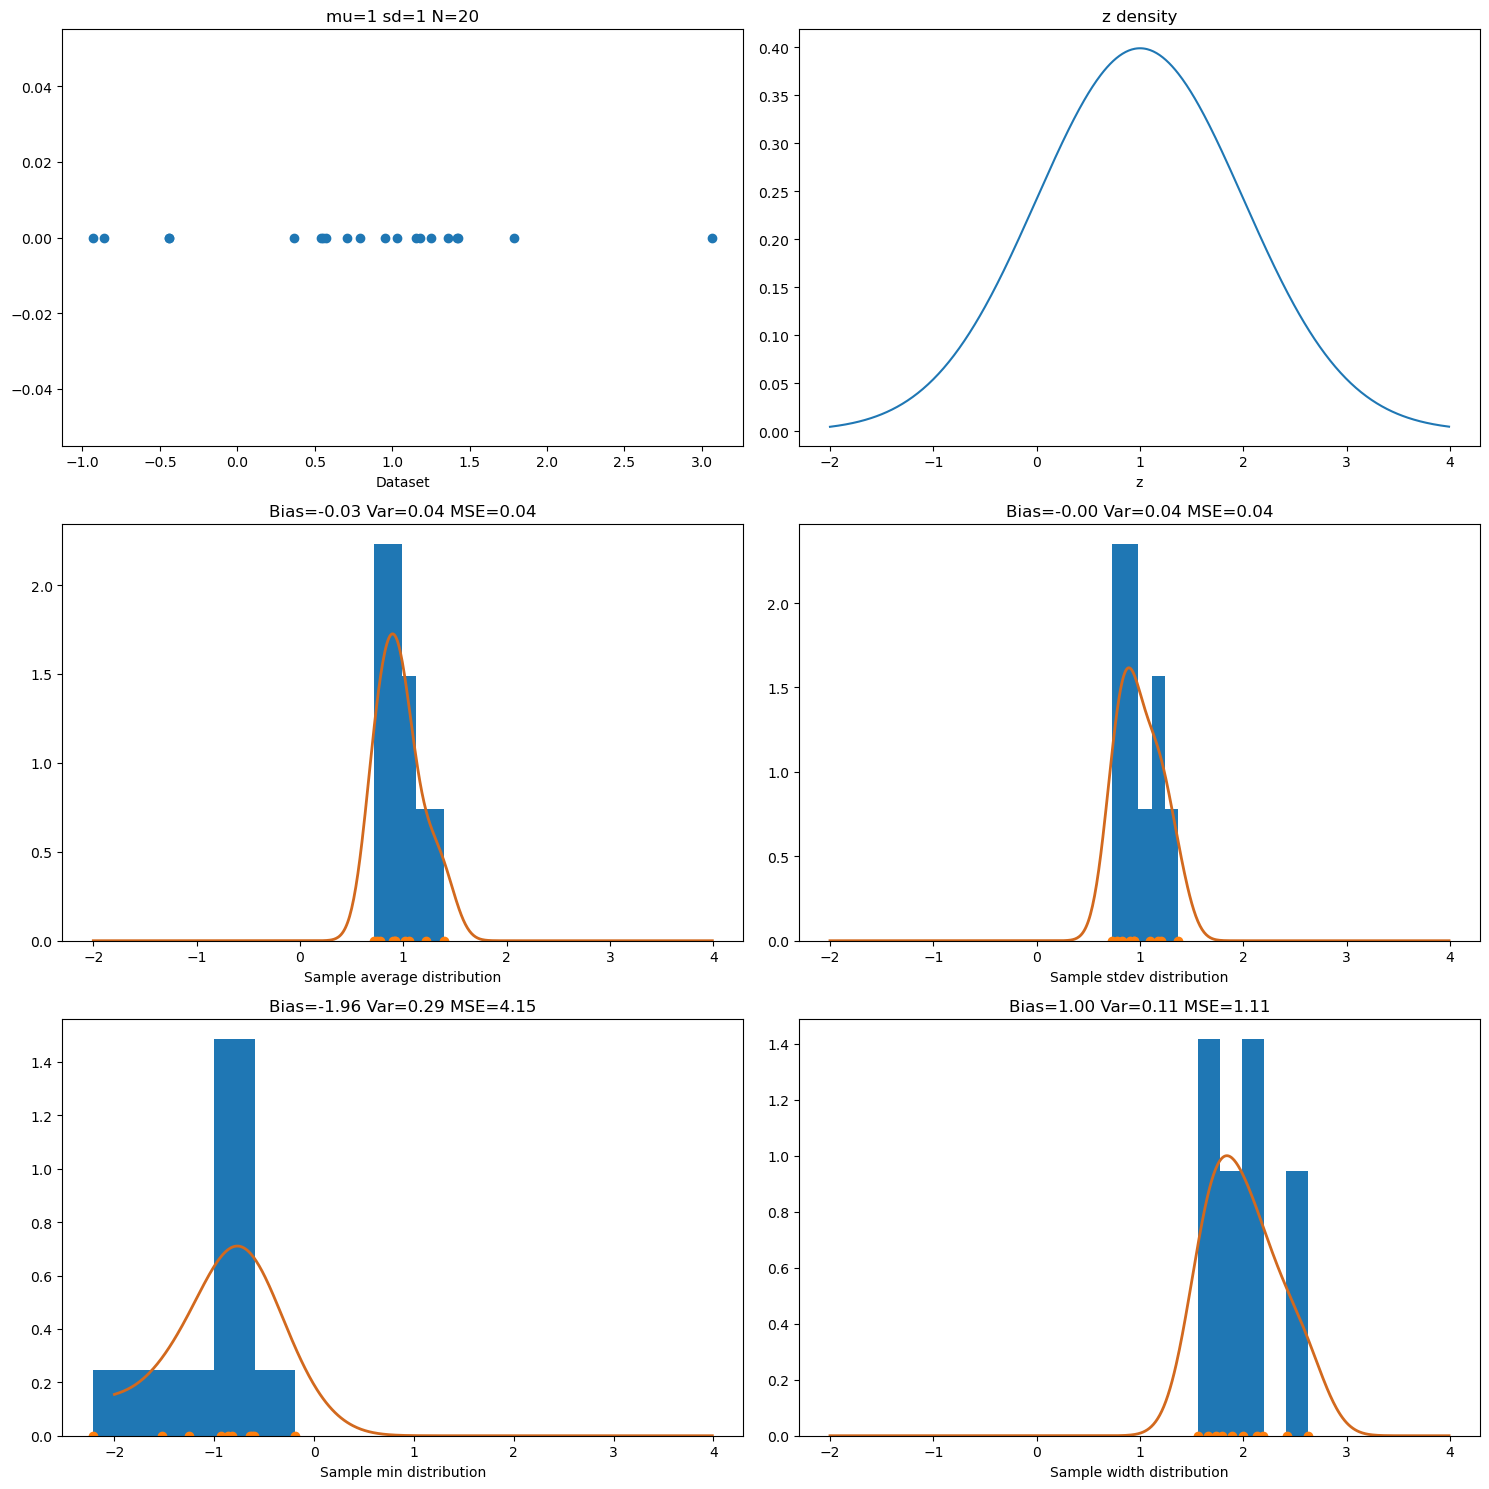

r=10 Make more runs...


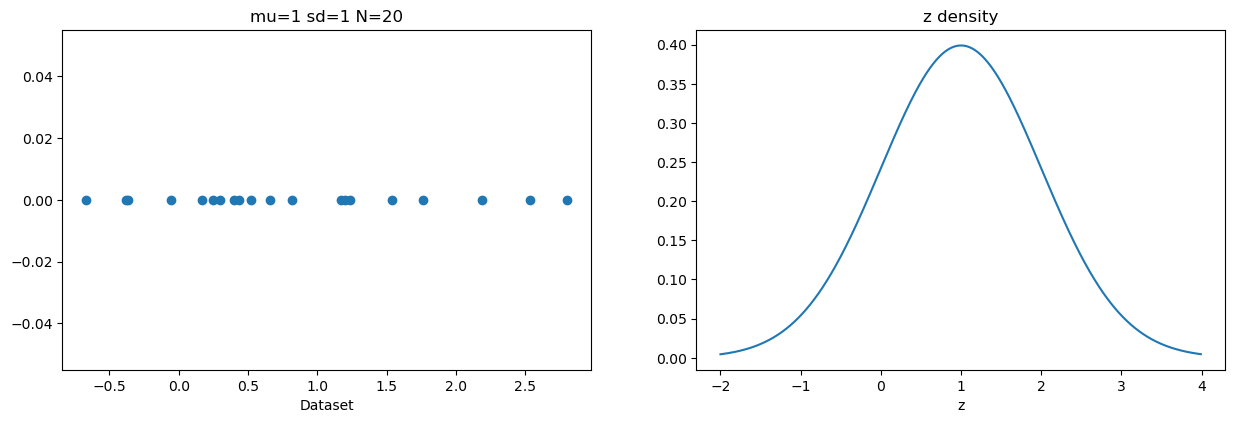

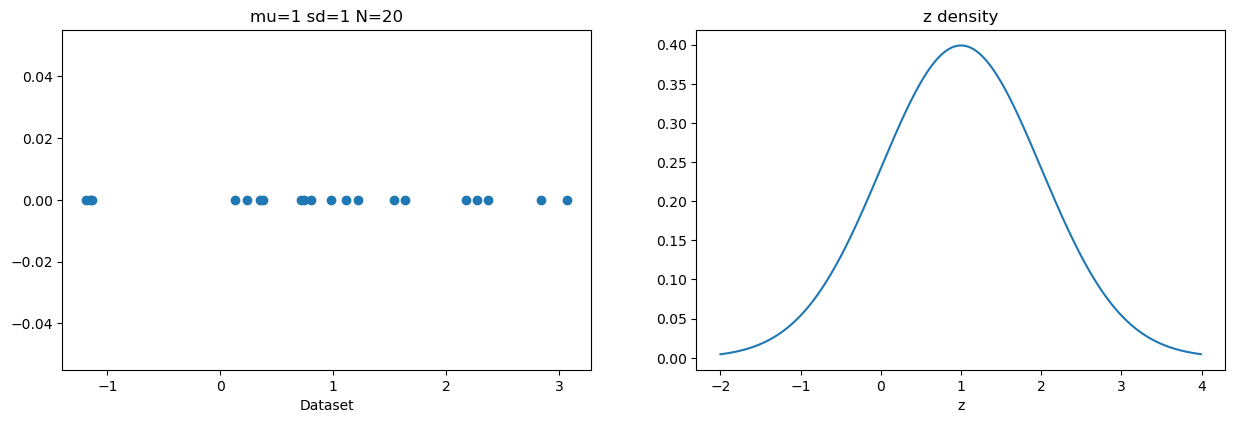

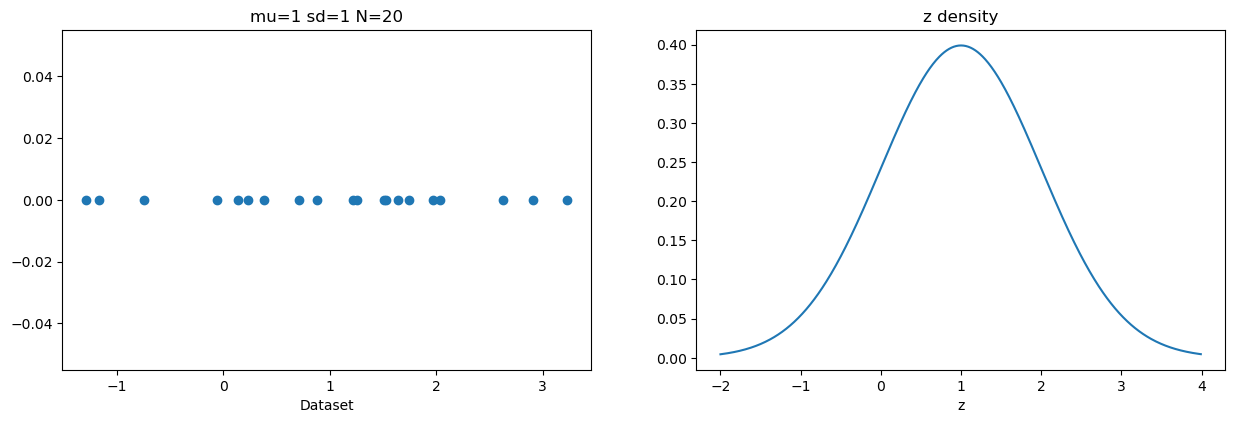

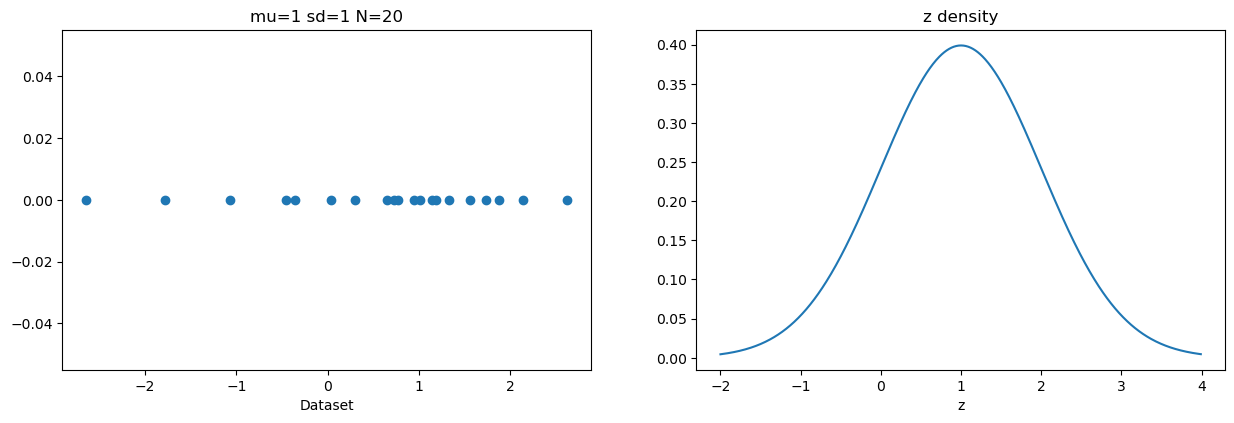

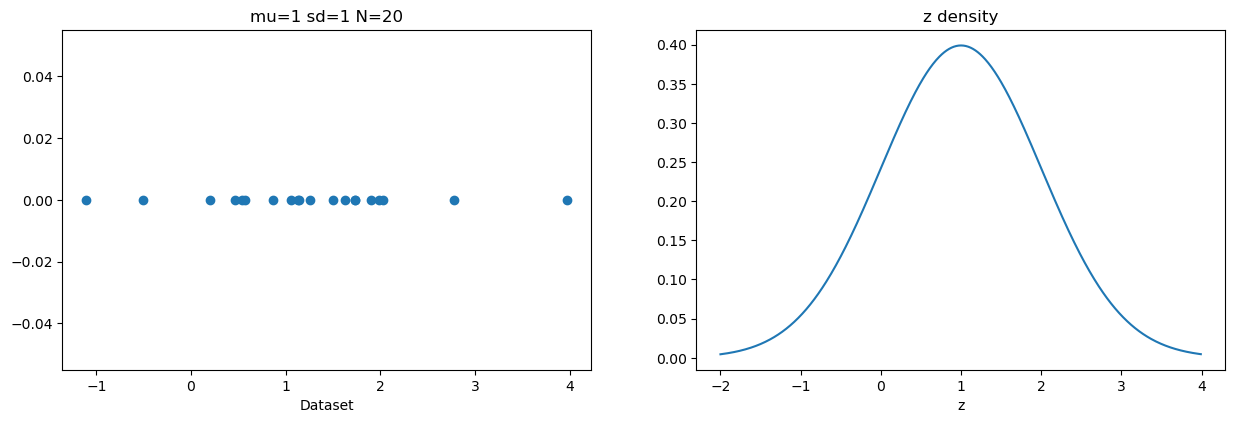

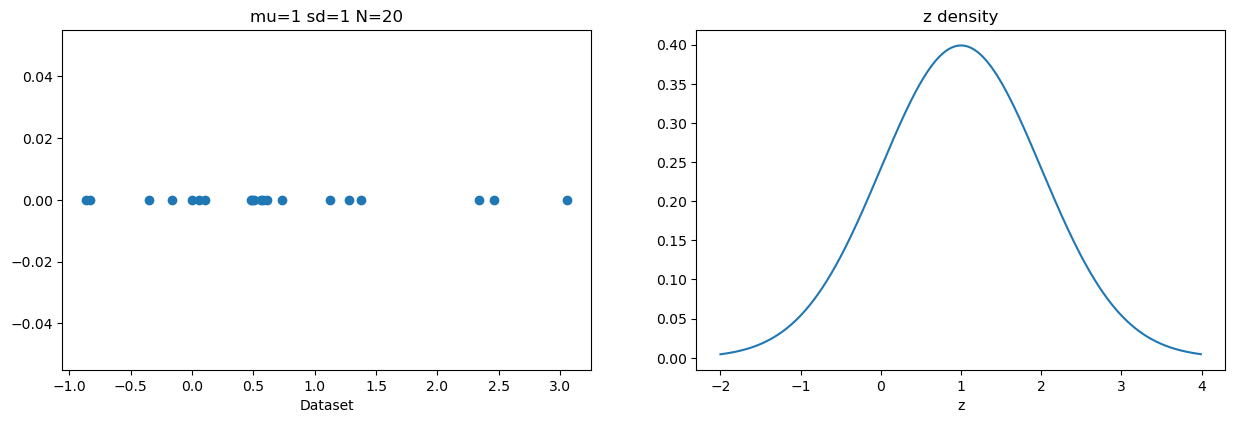

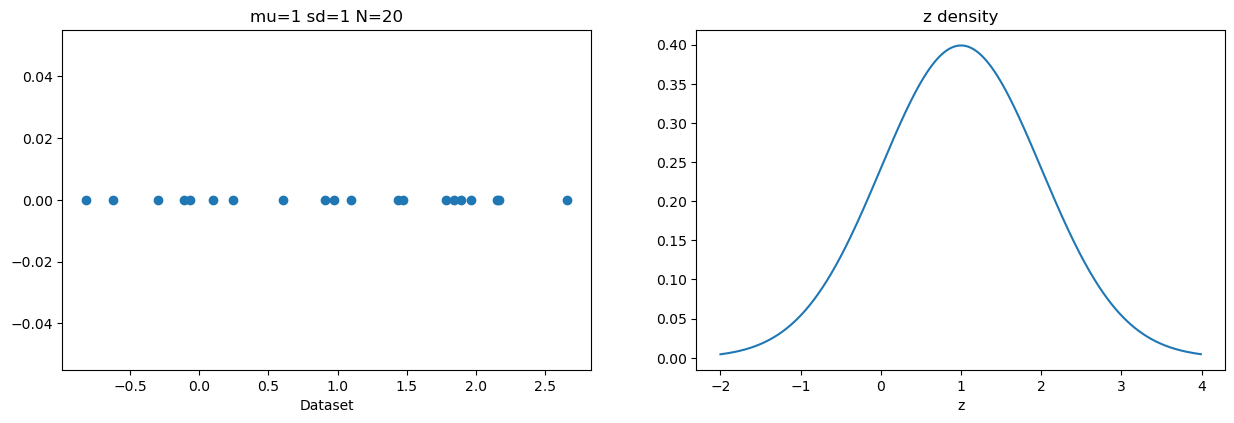

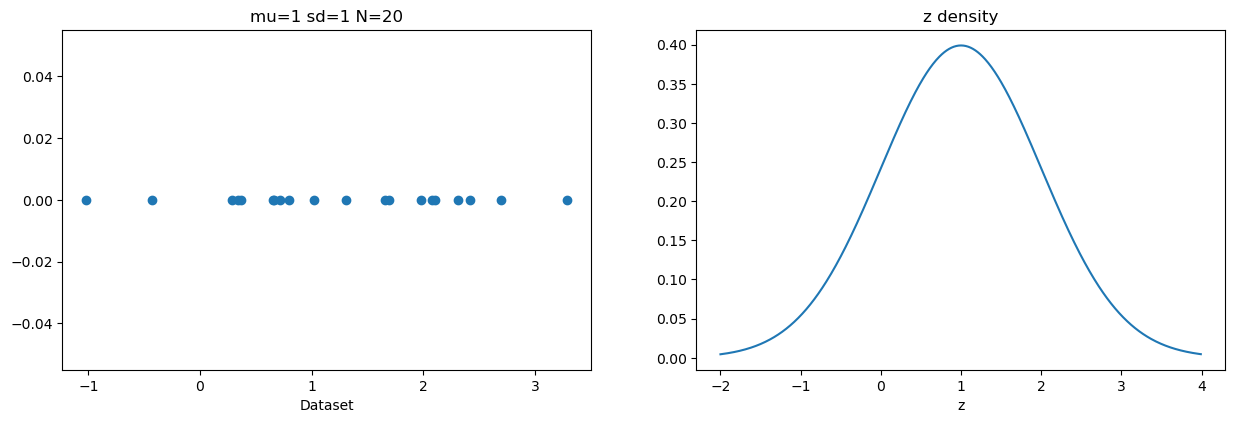

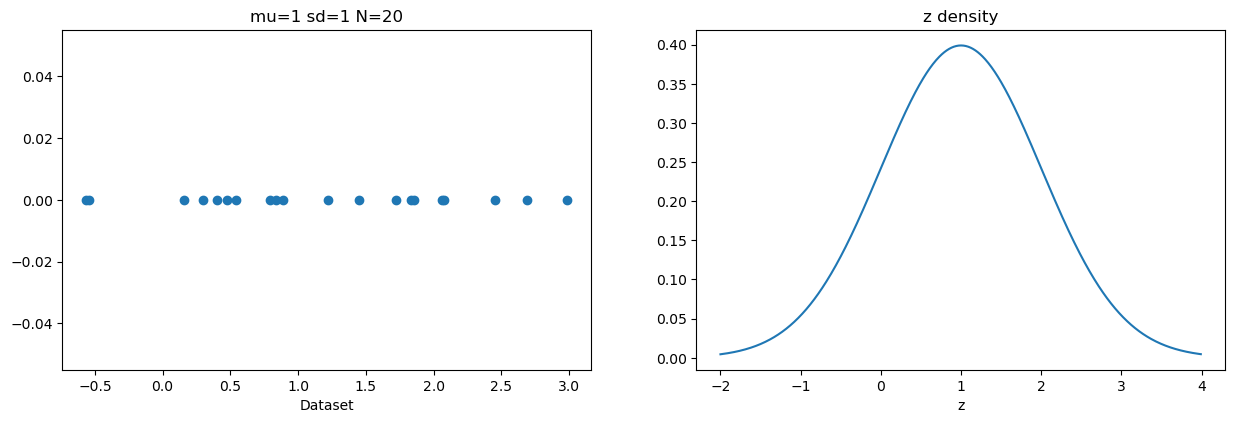

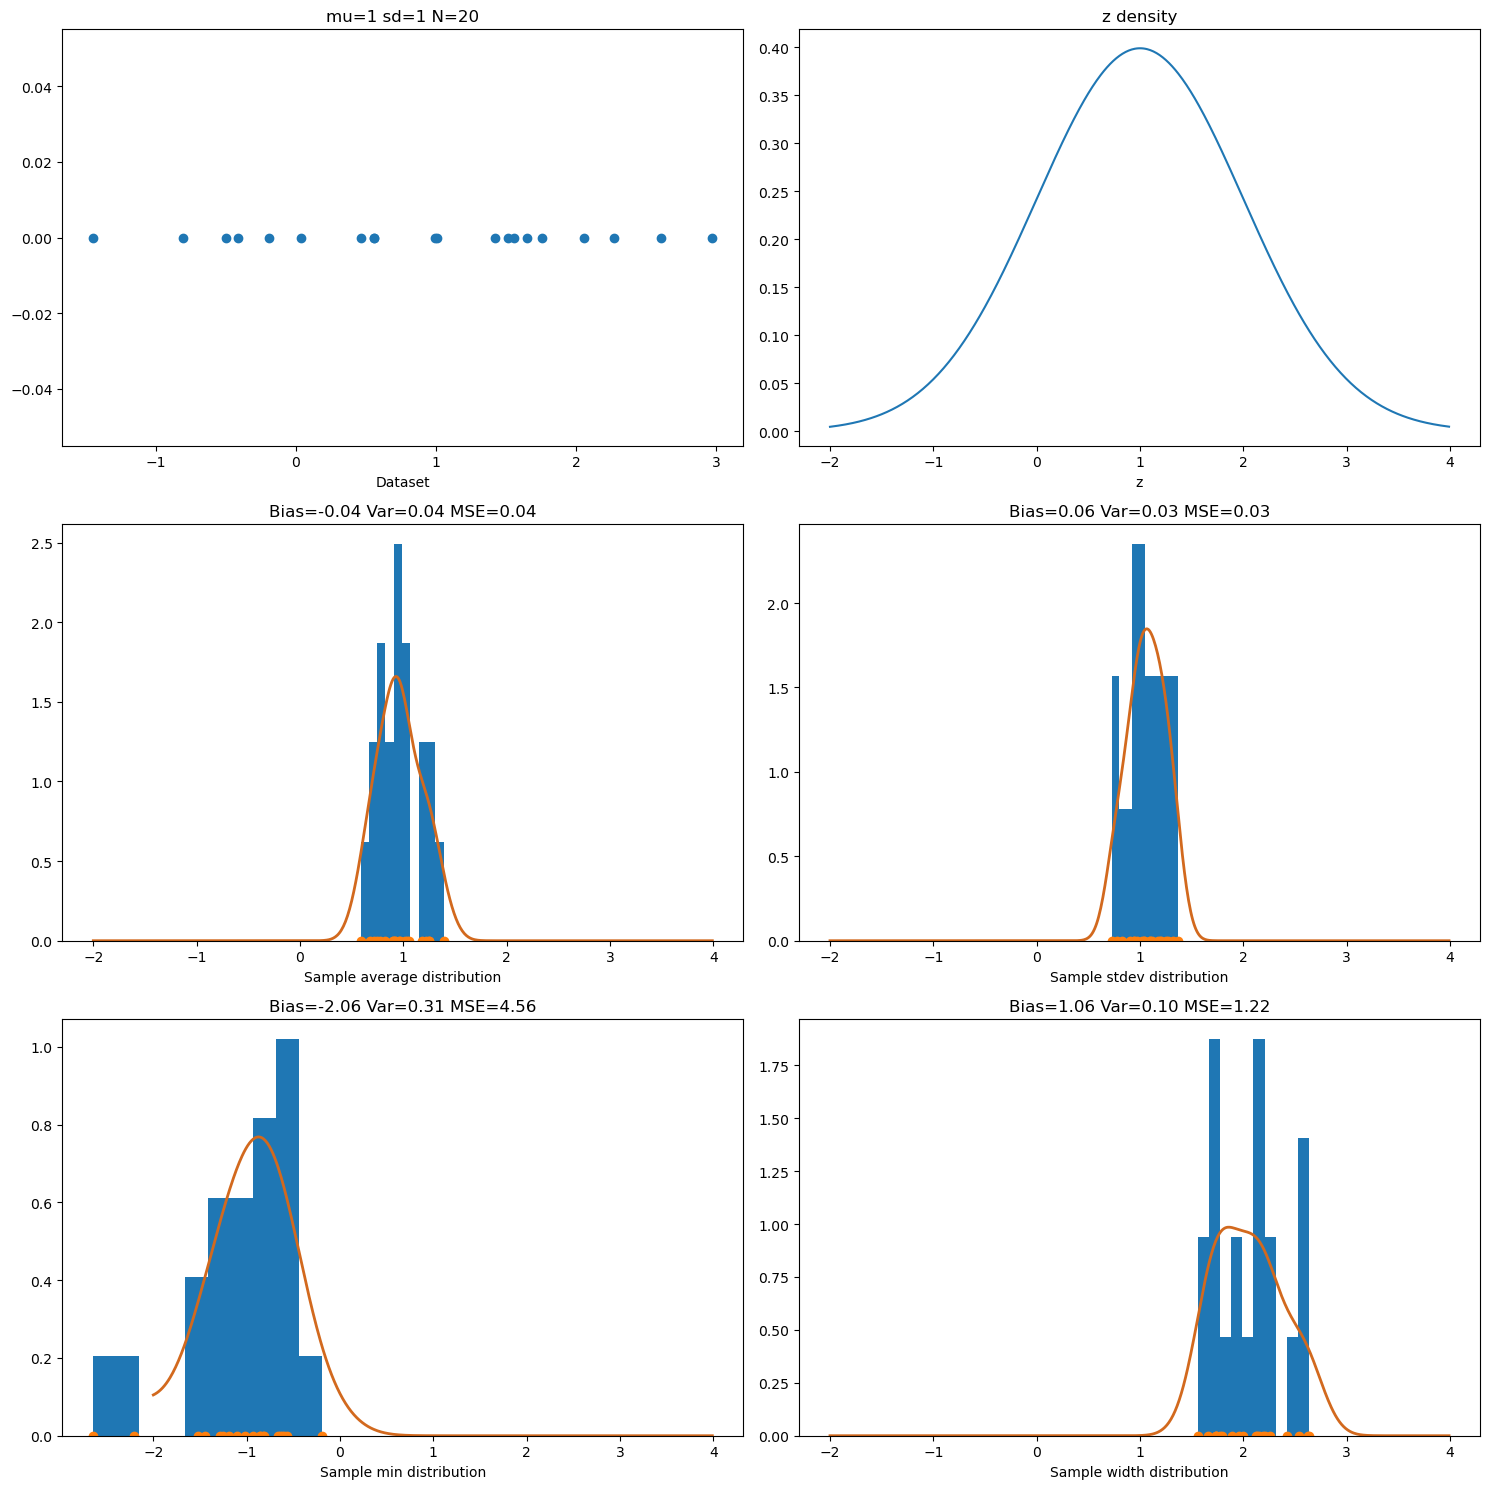

r=20 Make more runs...


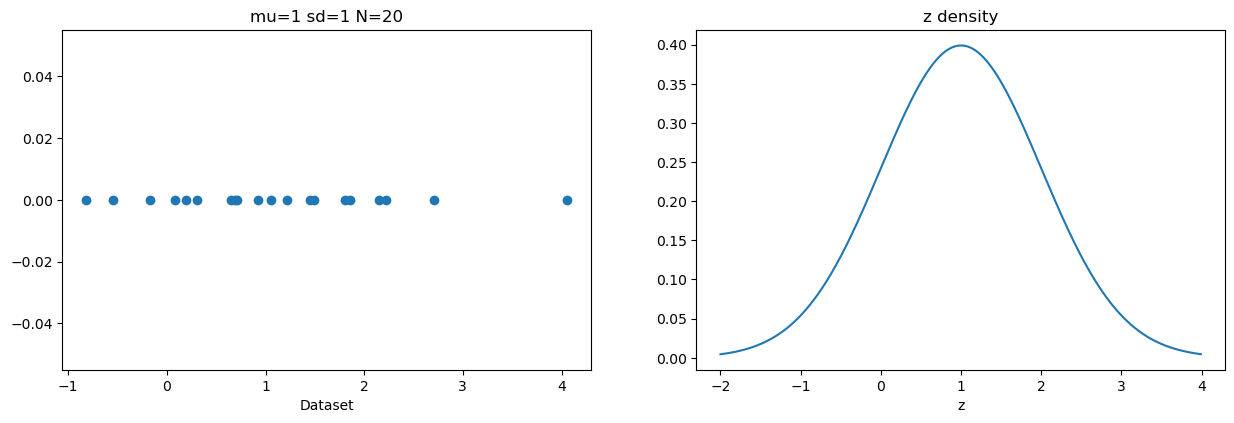

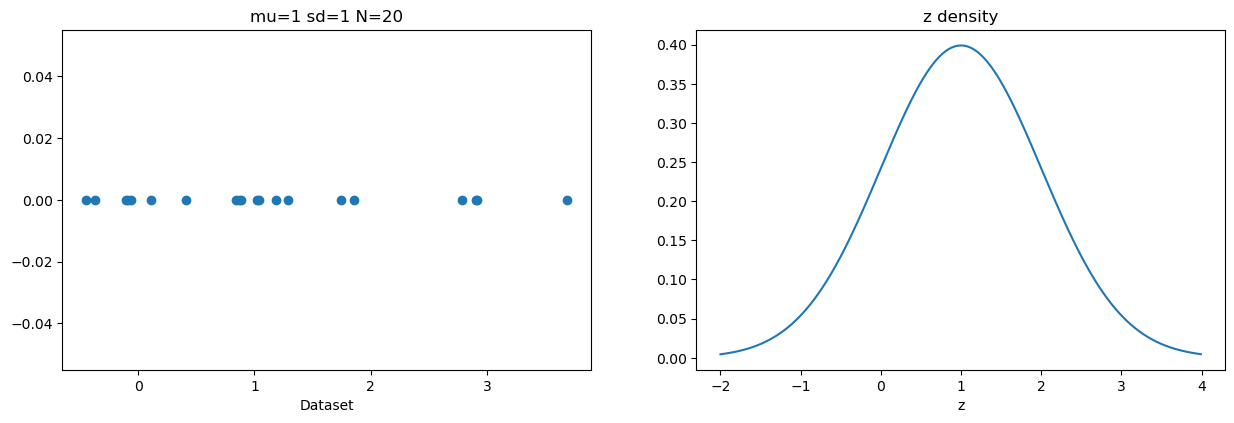

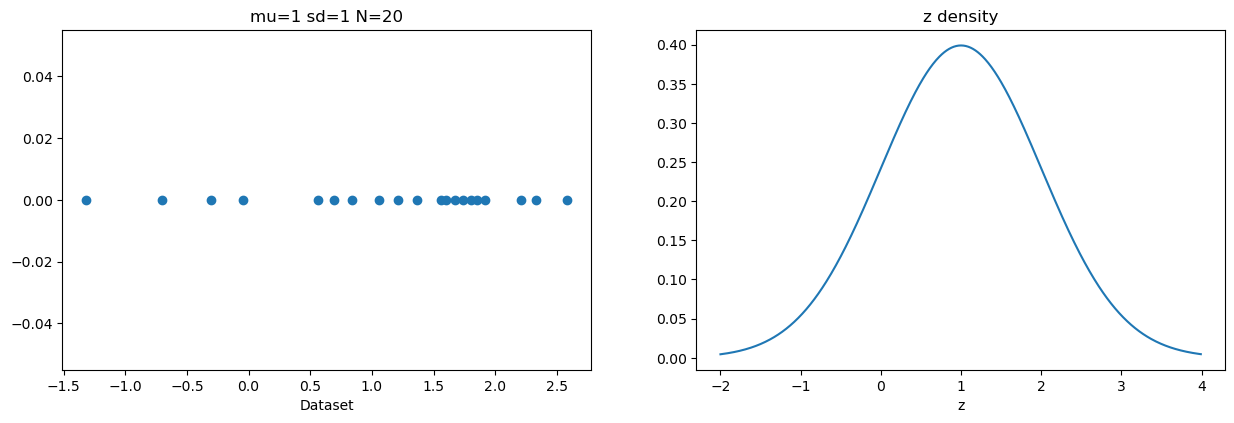

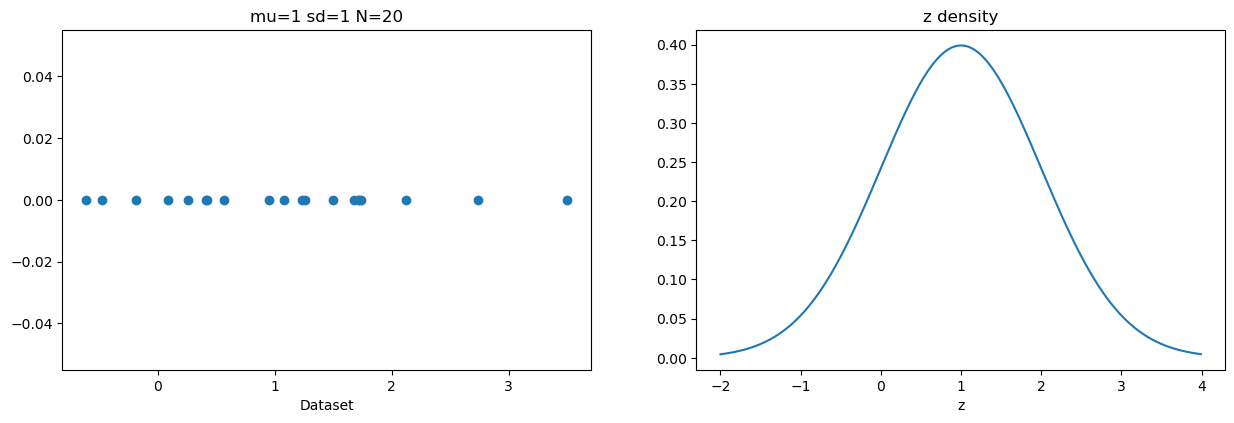

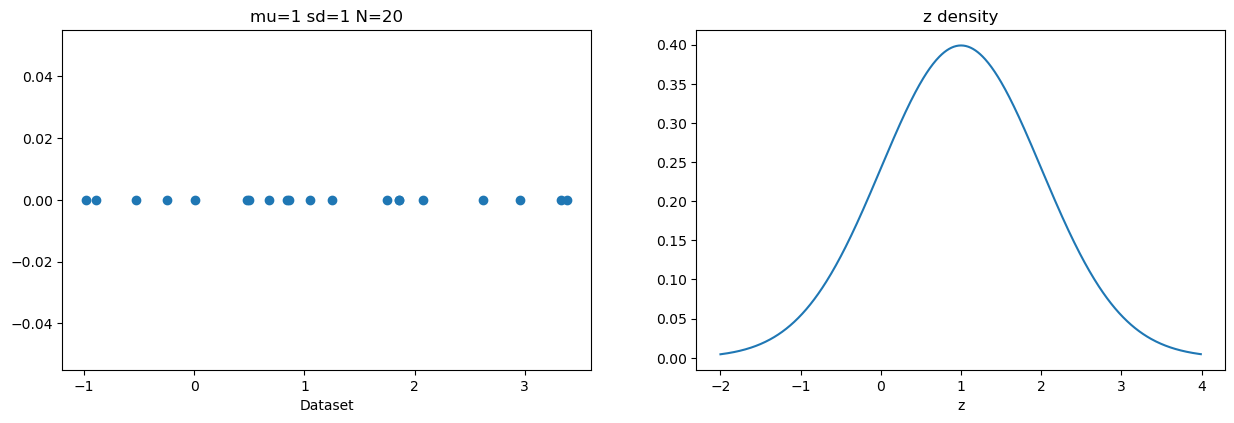

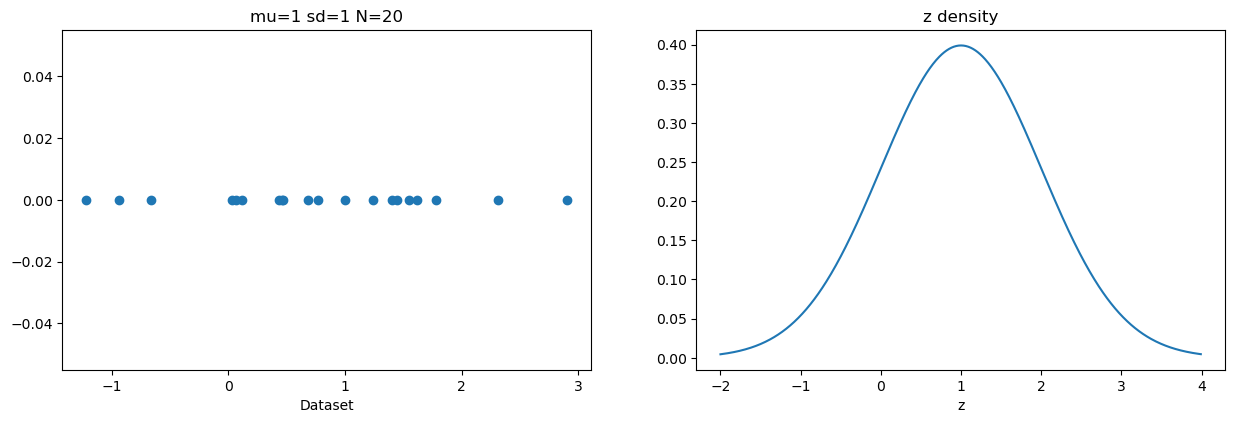

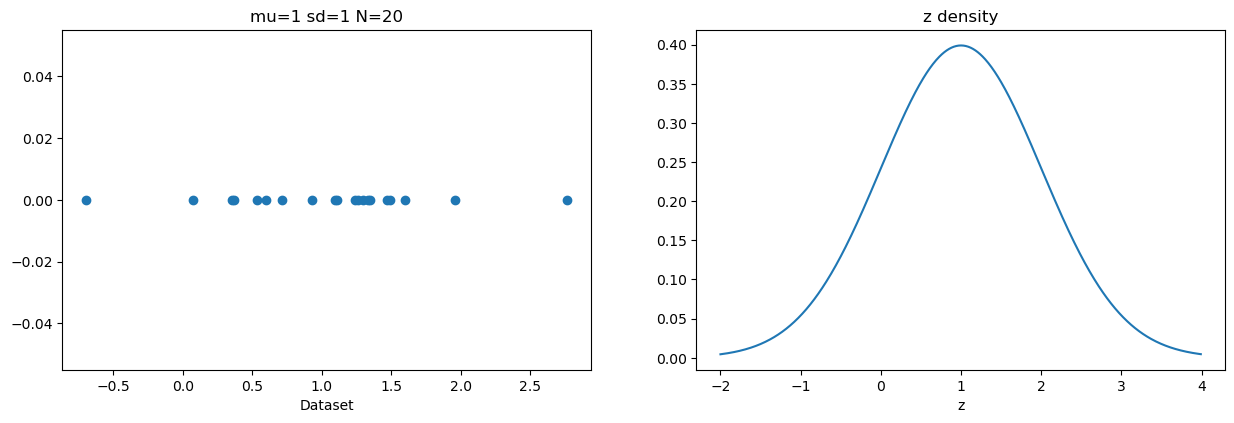

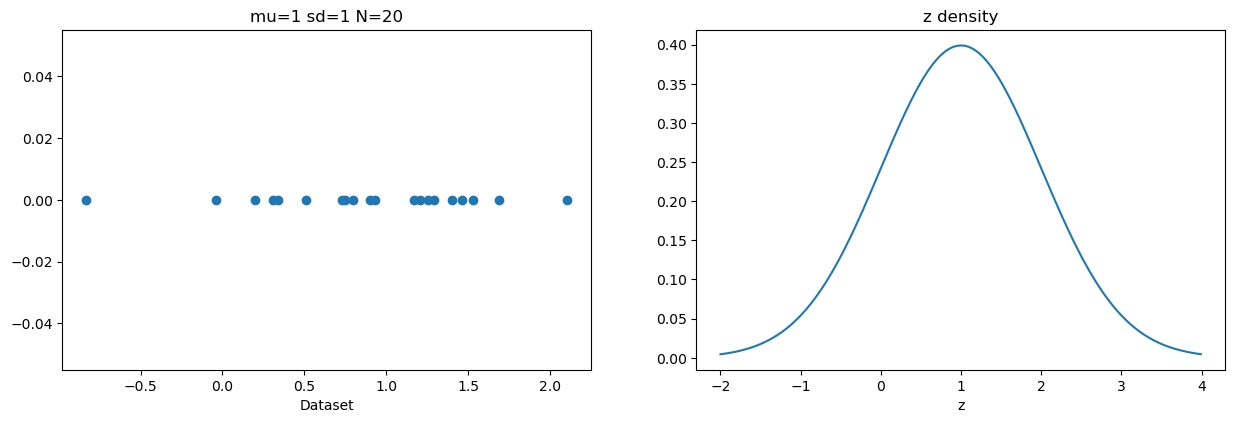

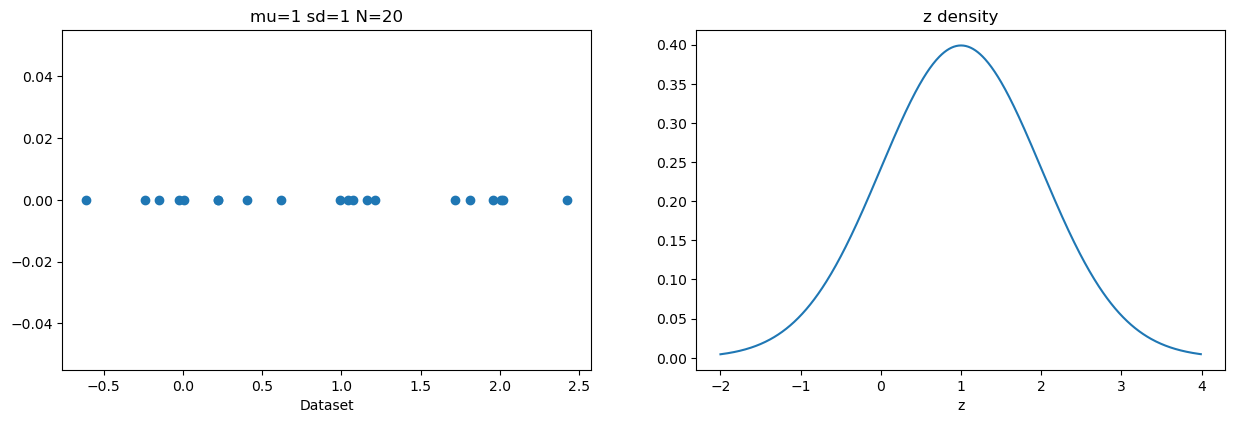

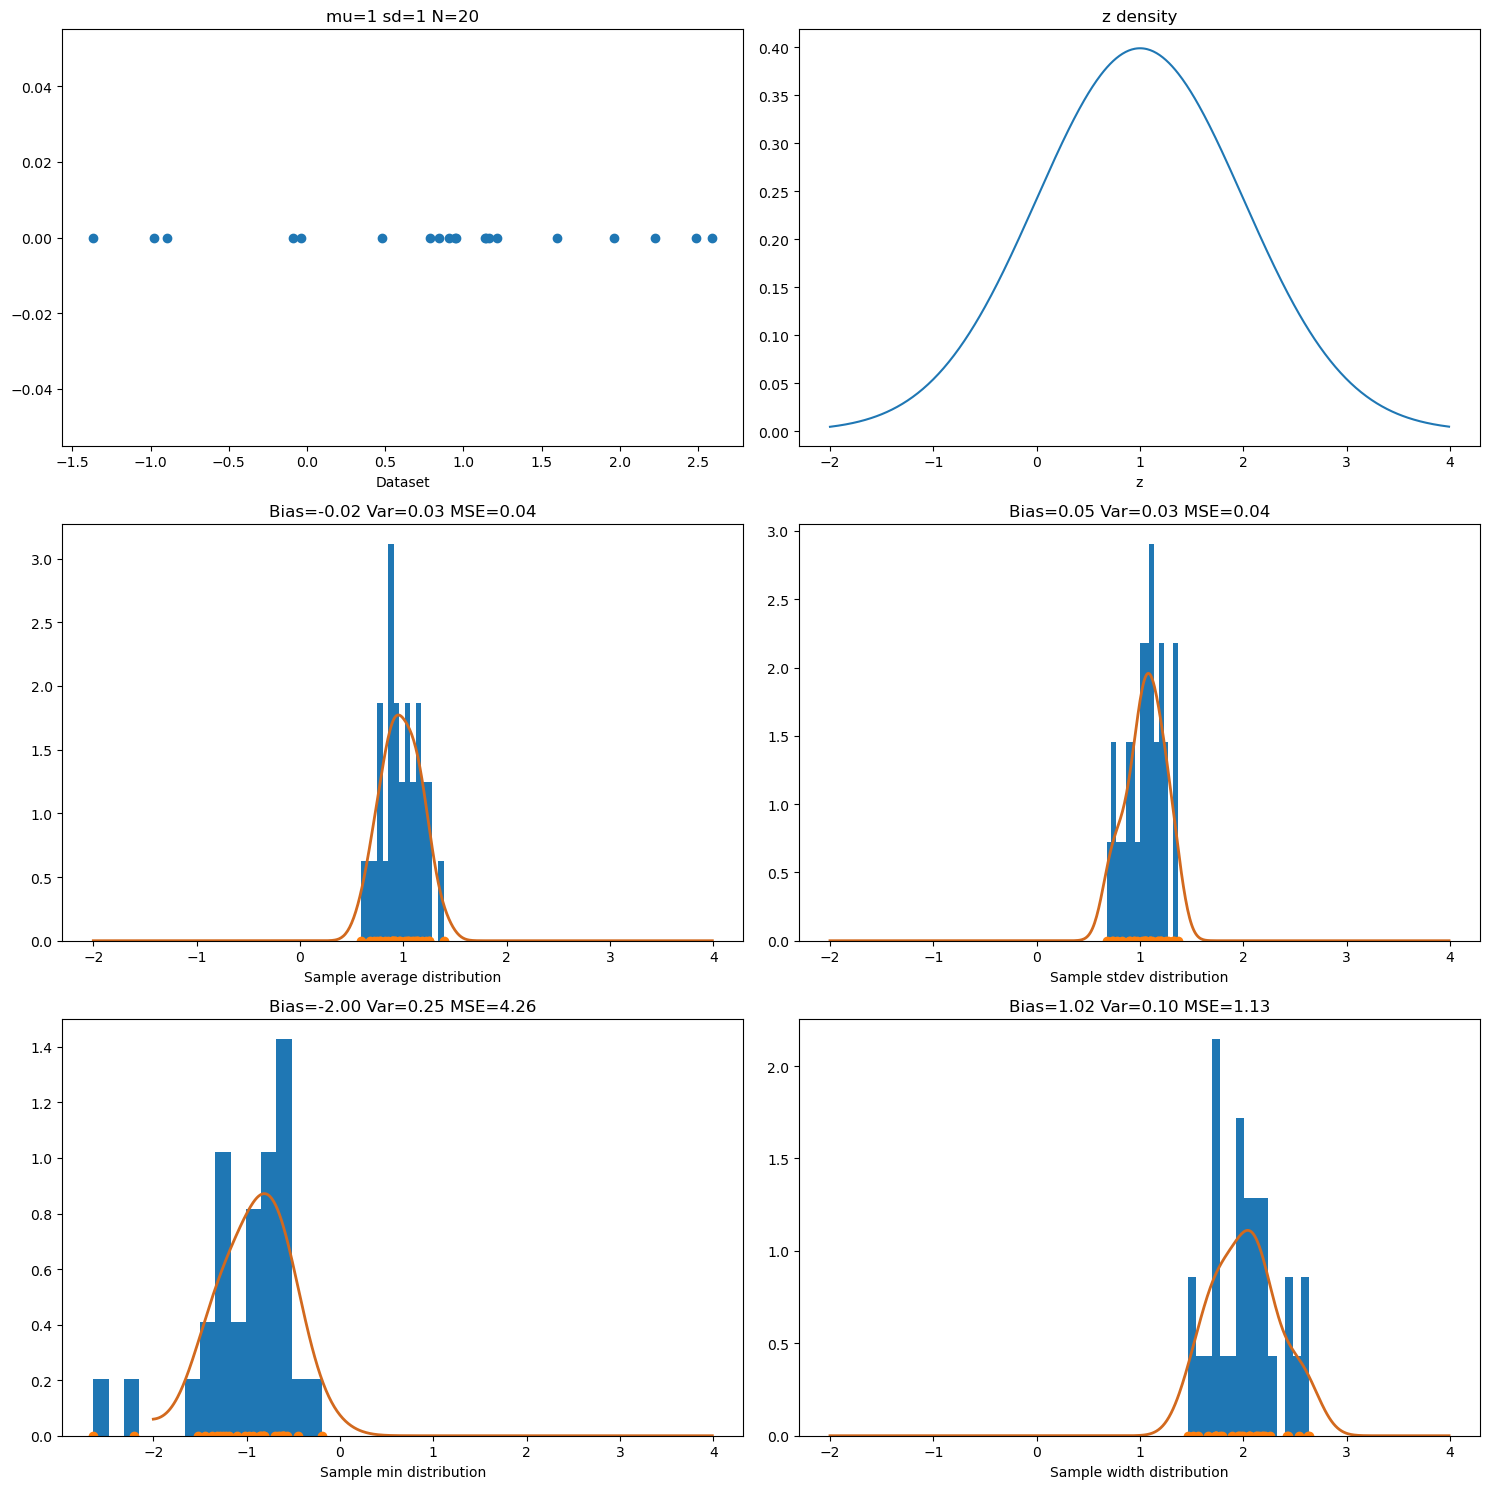

r=30 Make more runs...


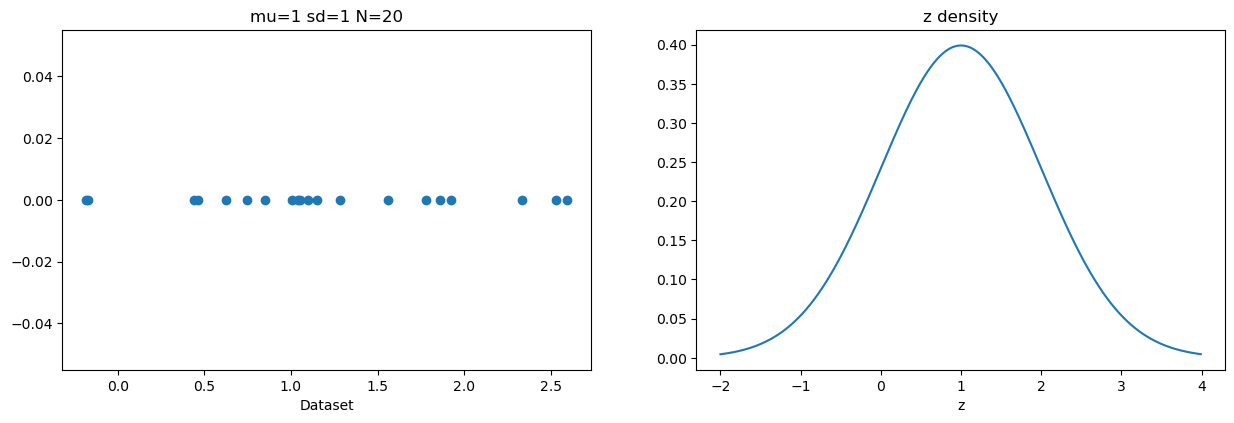

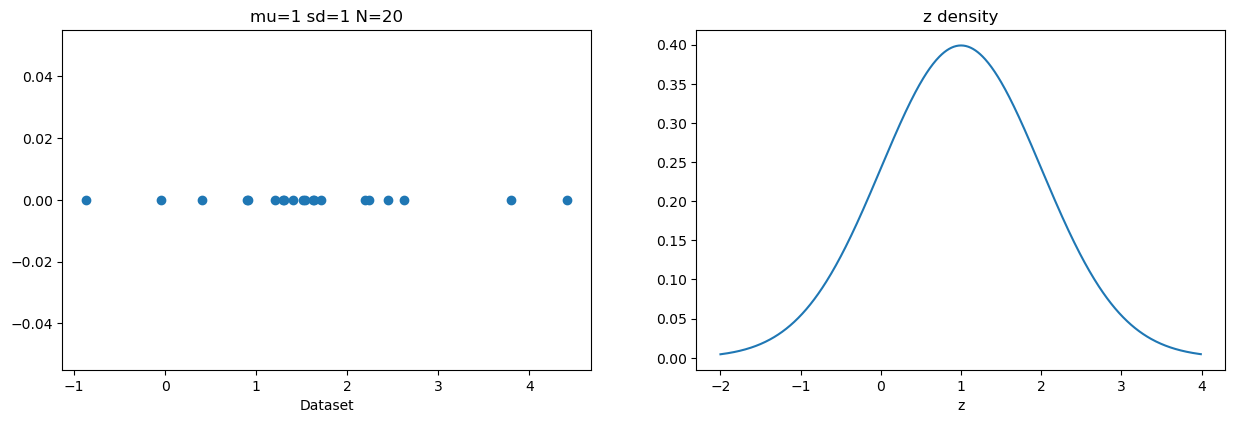

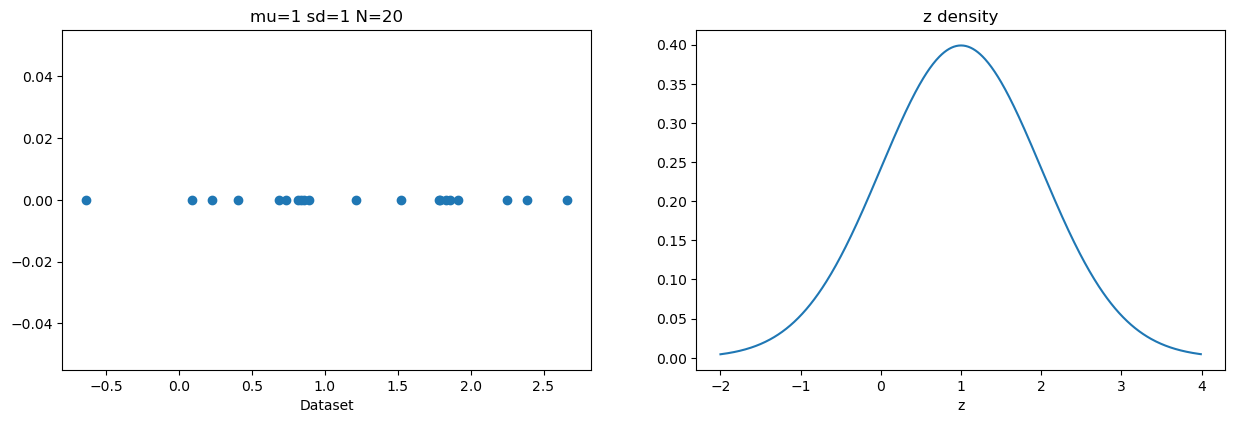

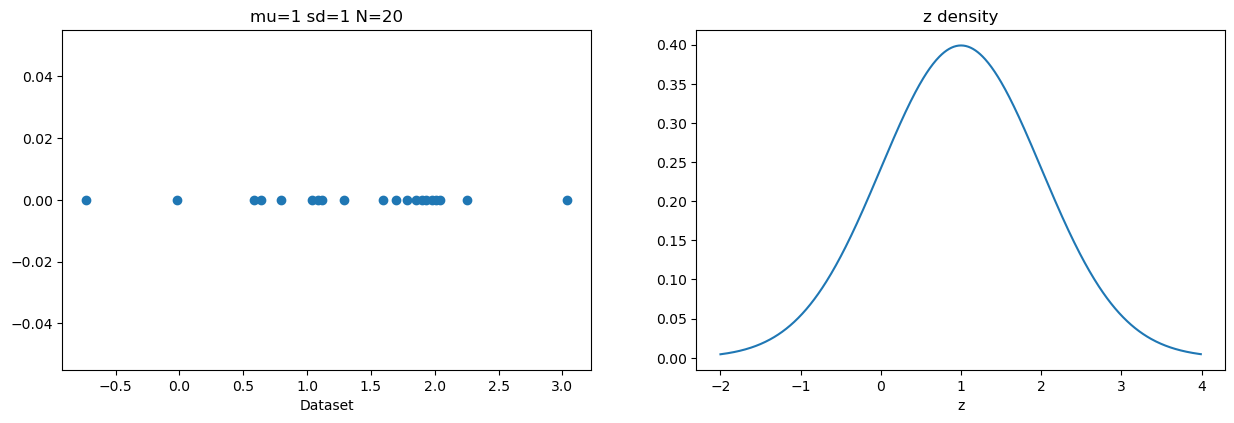

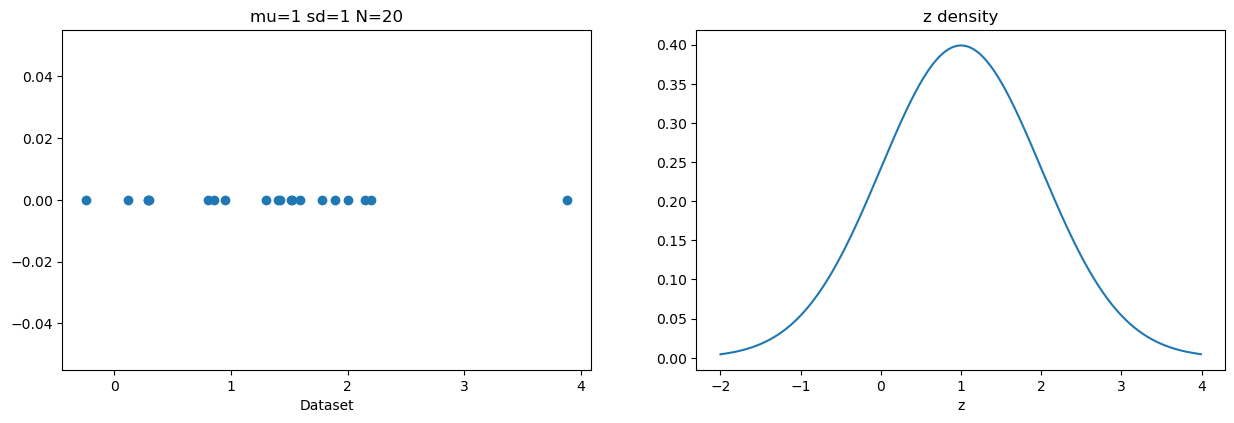

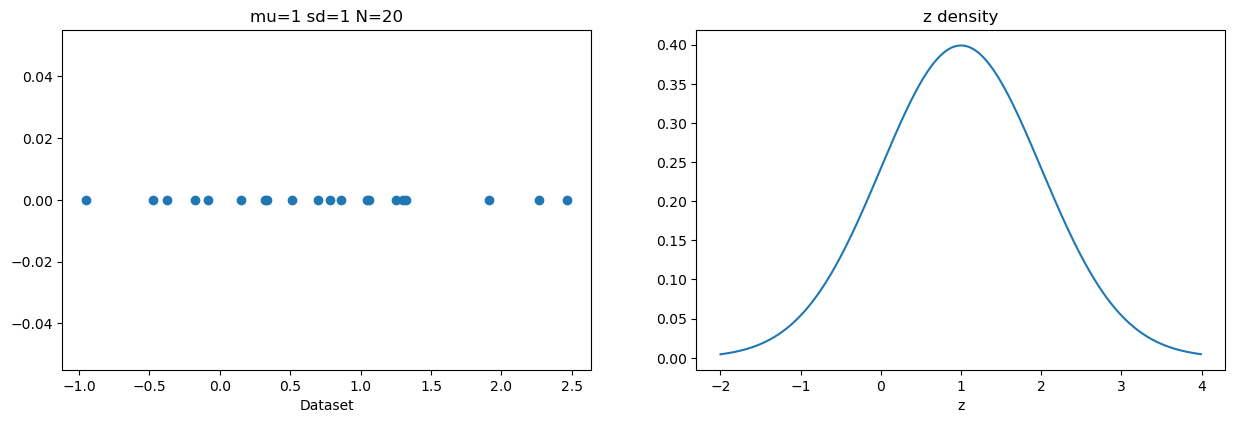

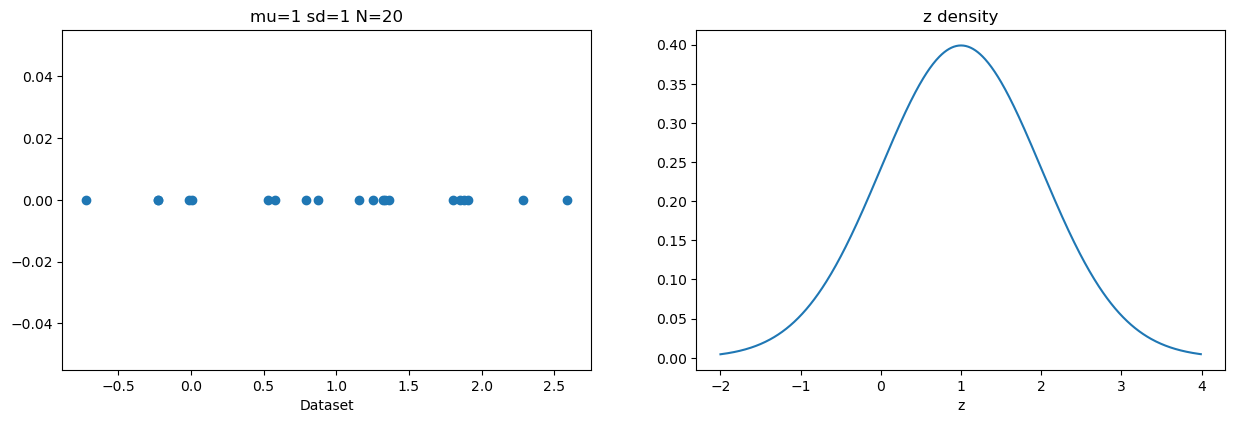

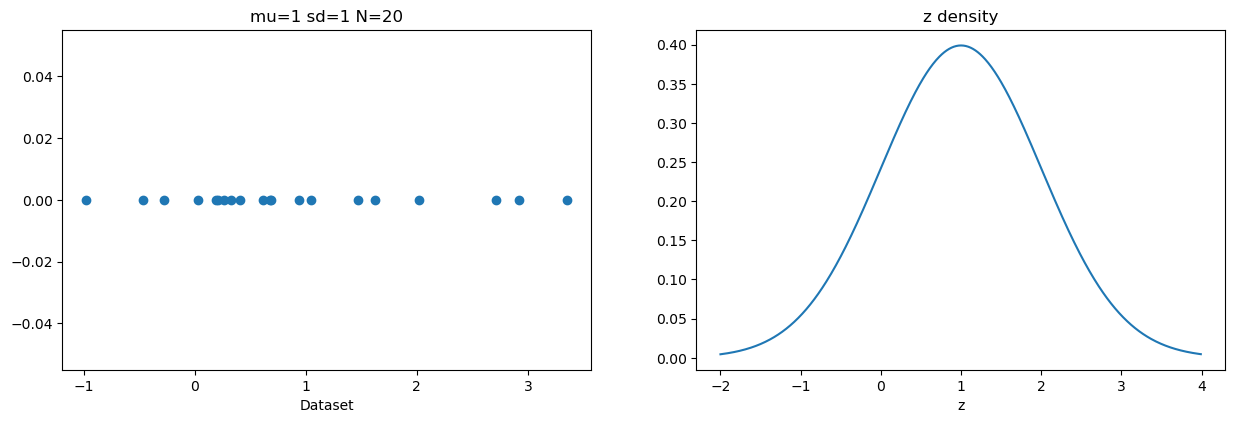

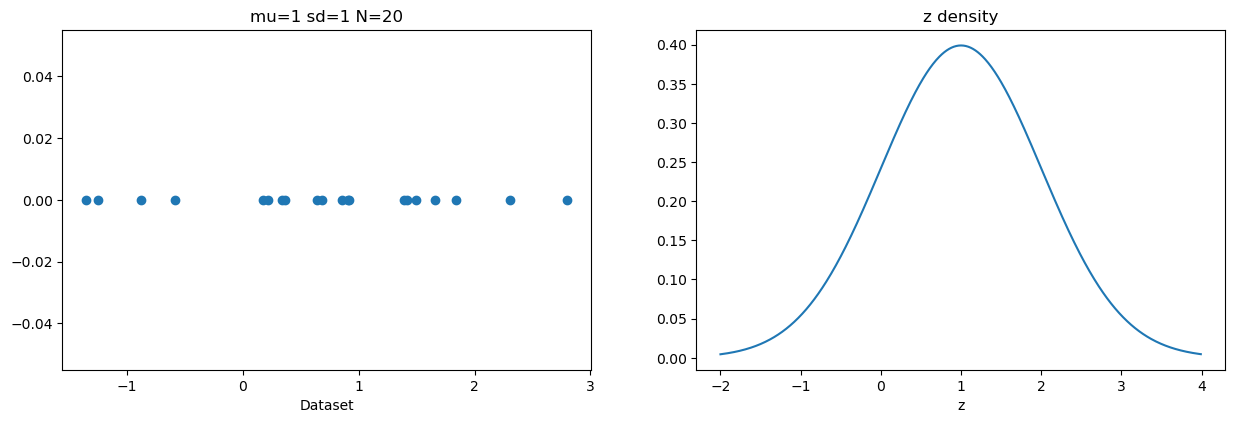

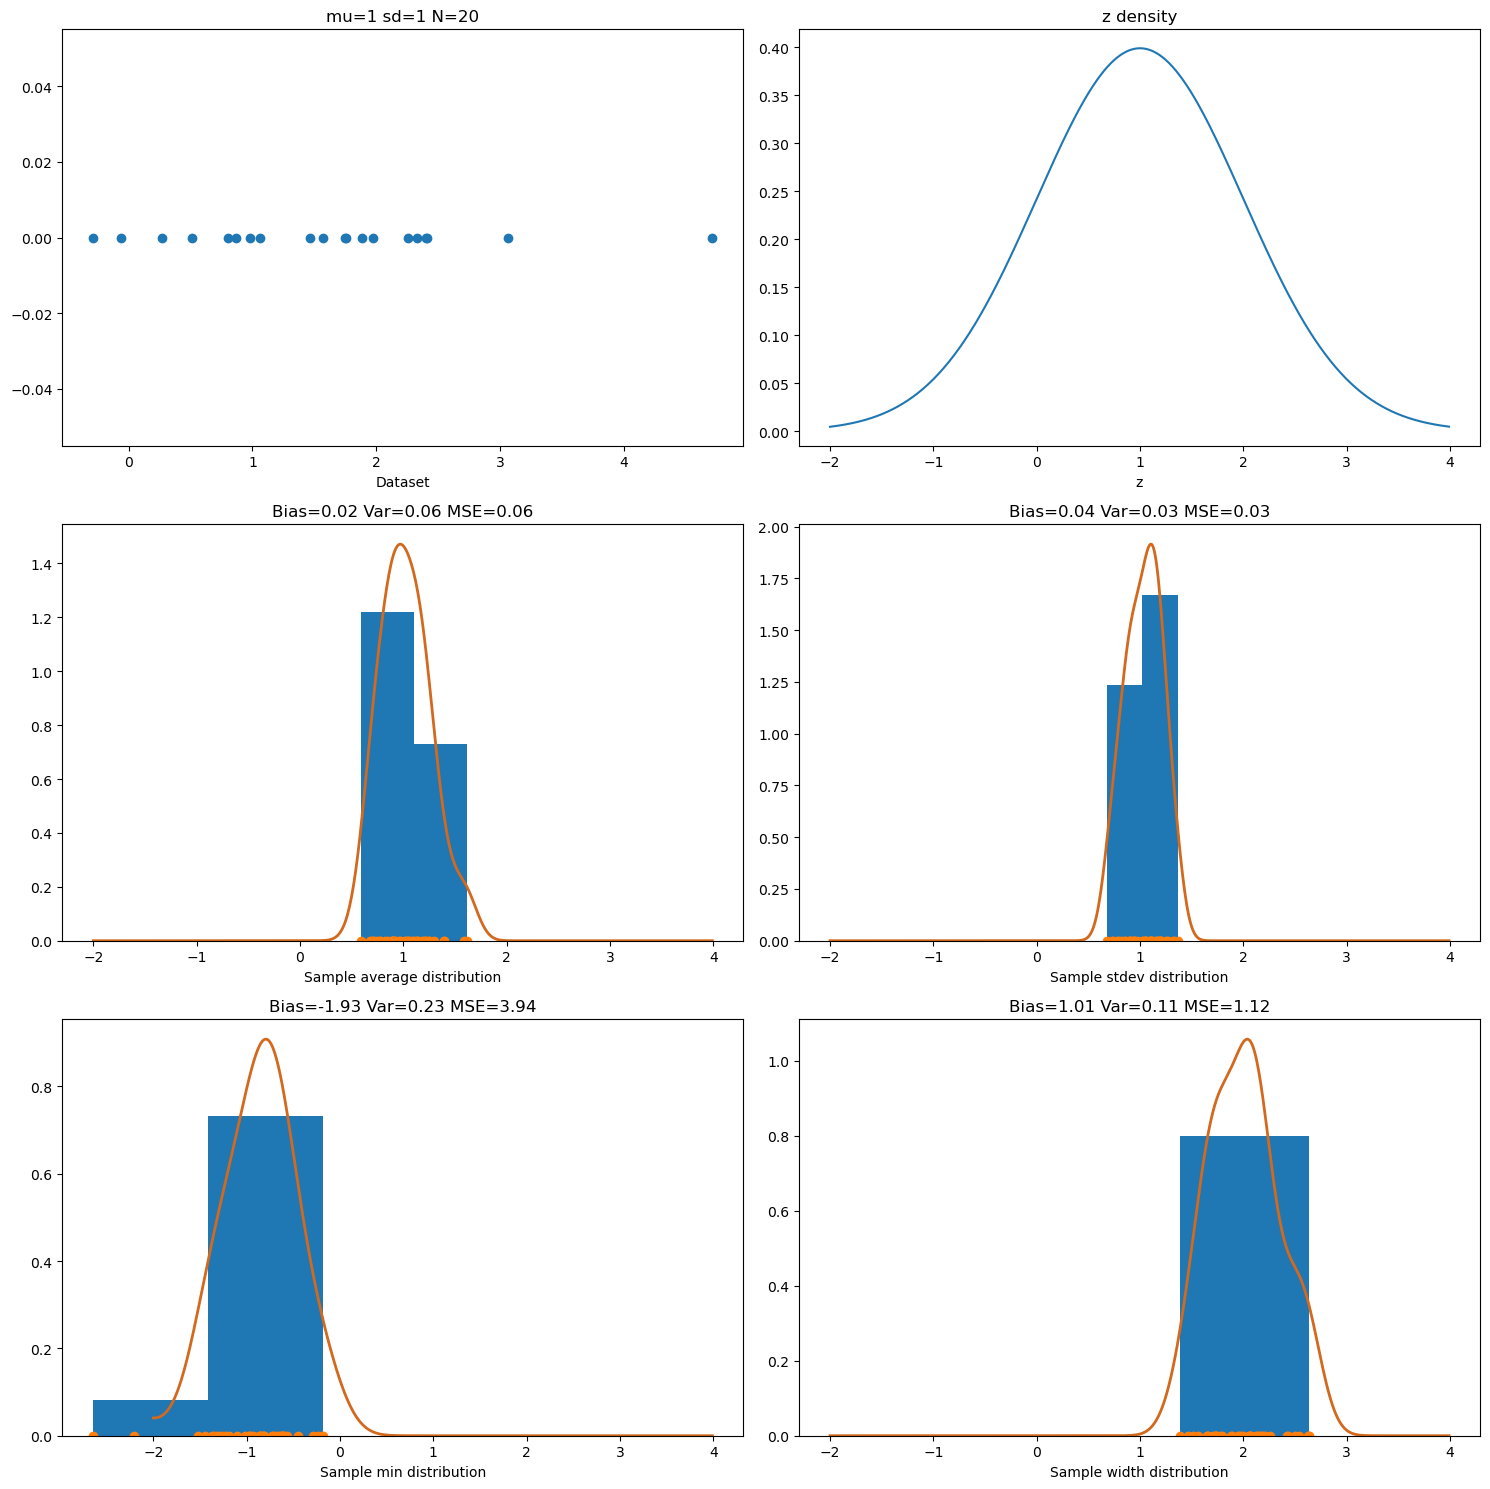

r=40 Make more runs...


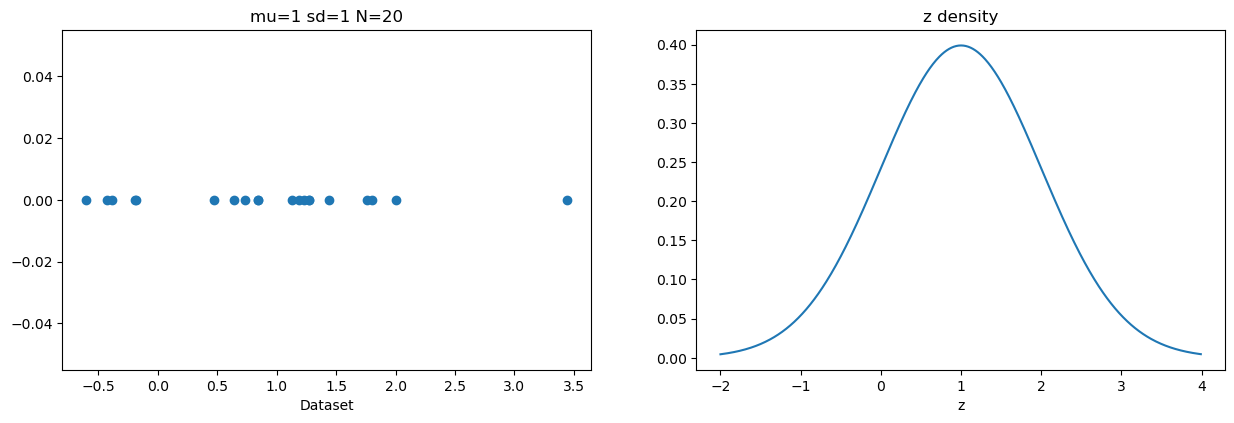

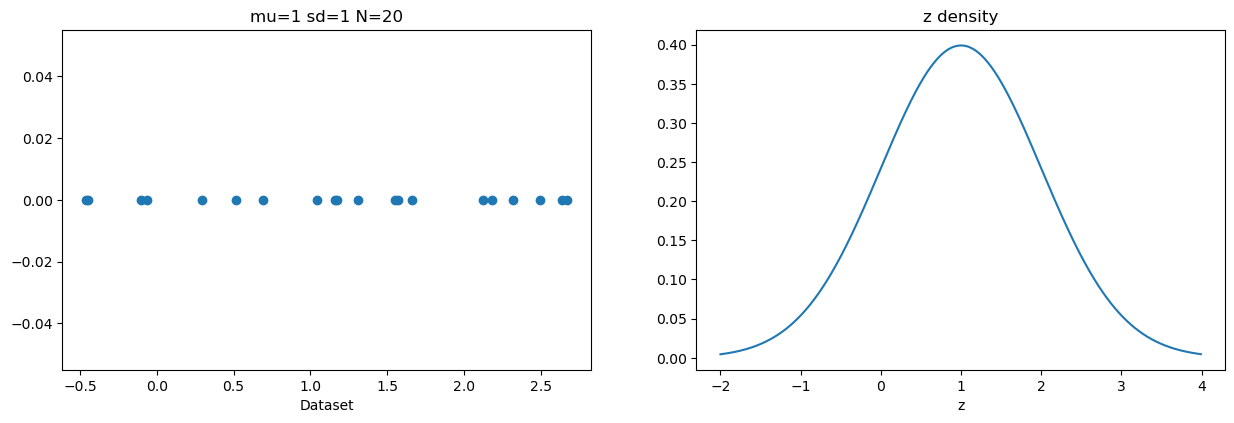

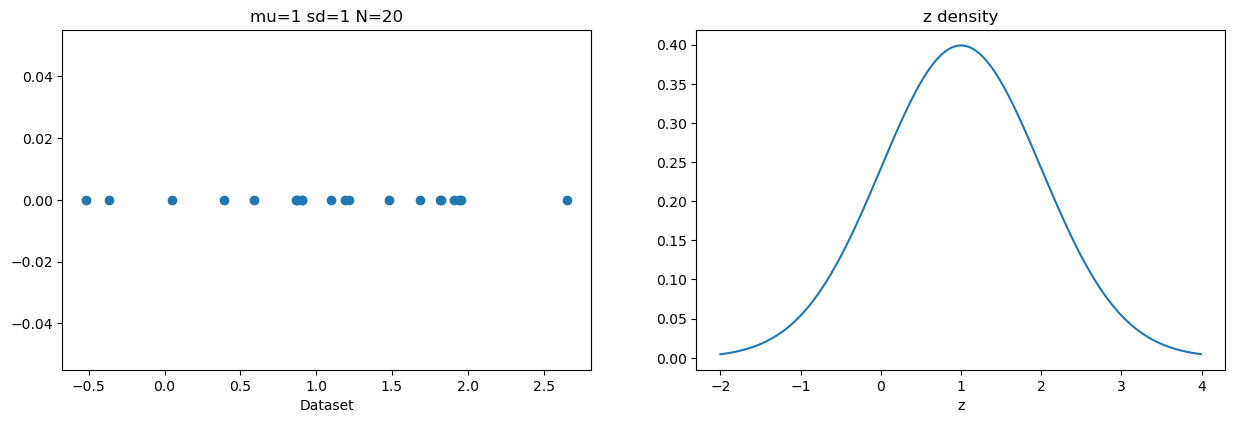

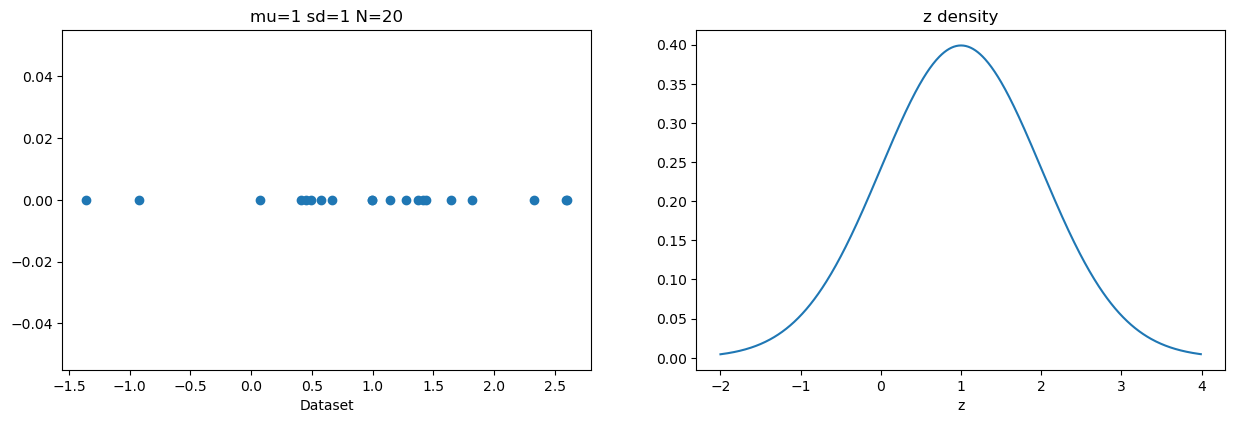

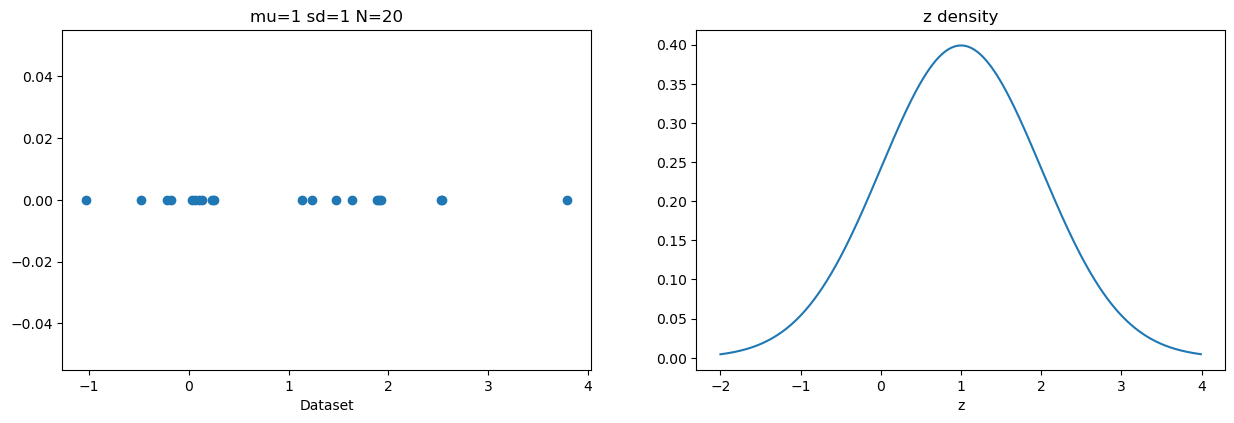

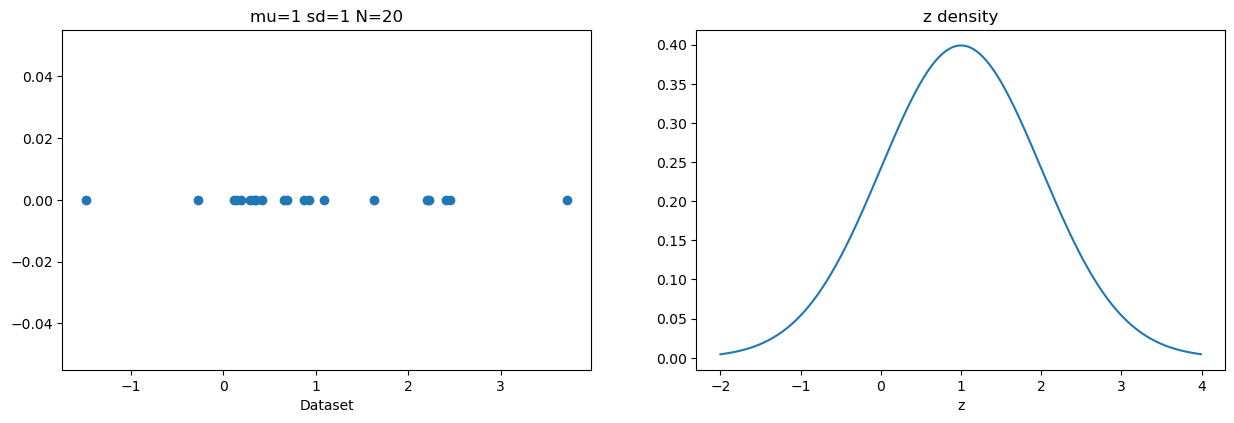

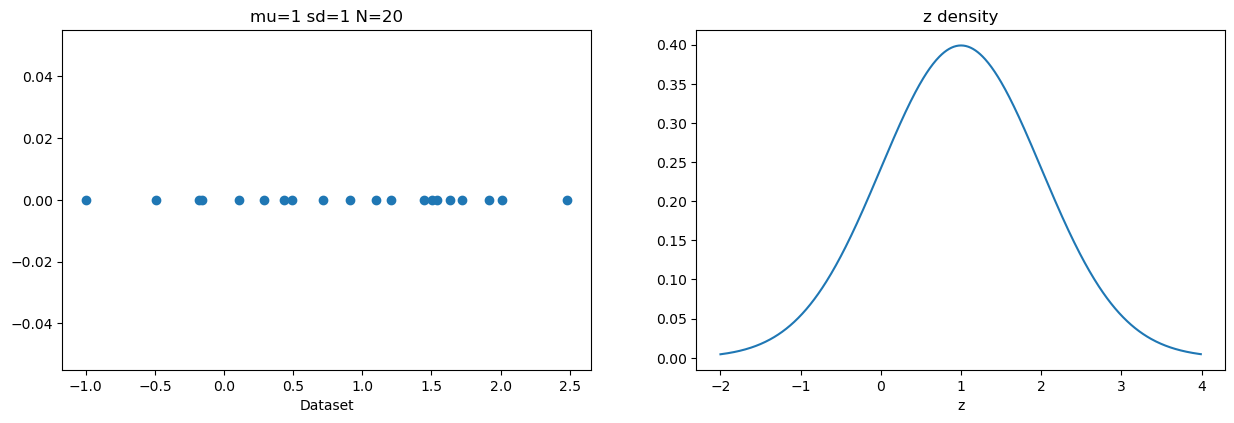

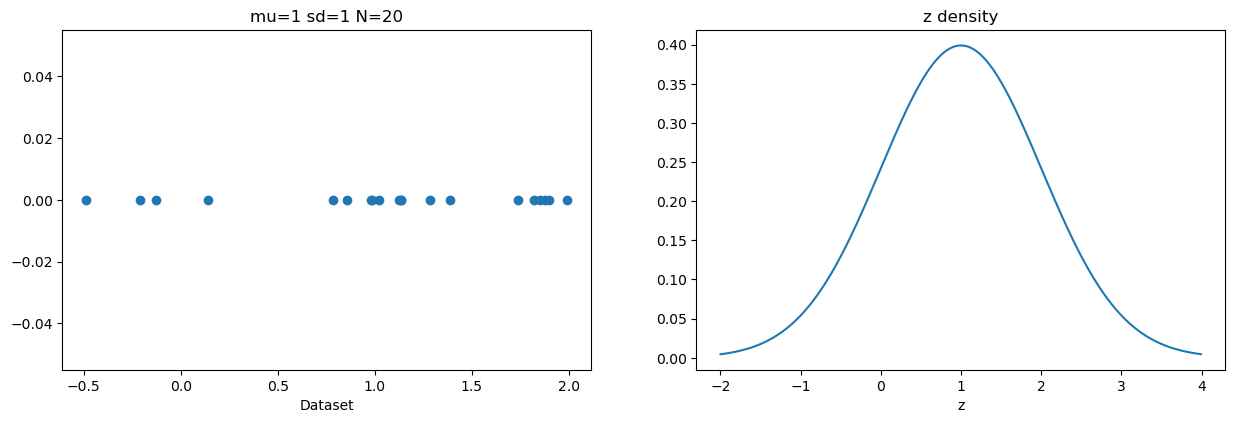

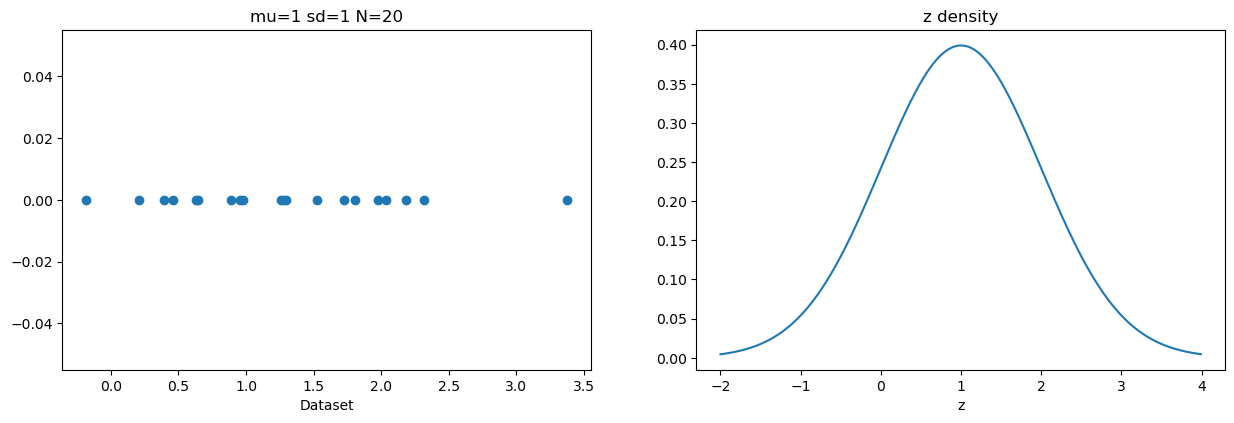

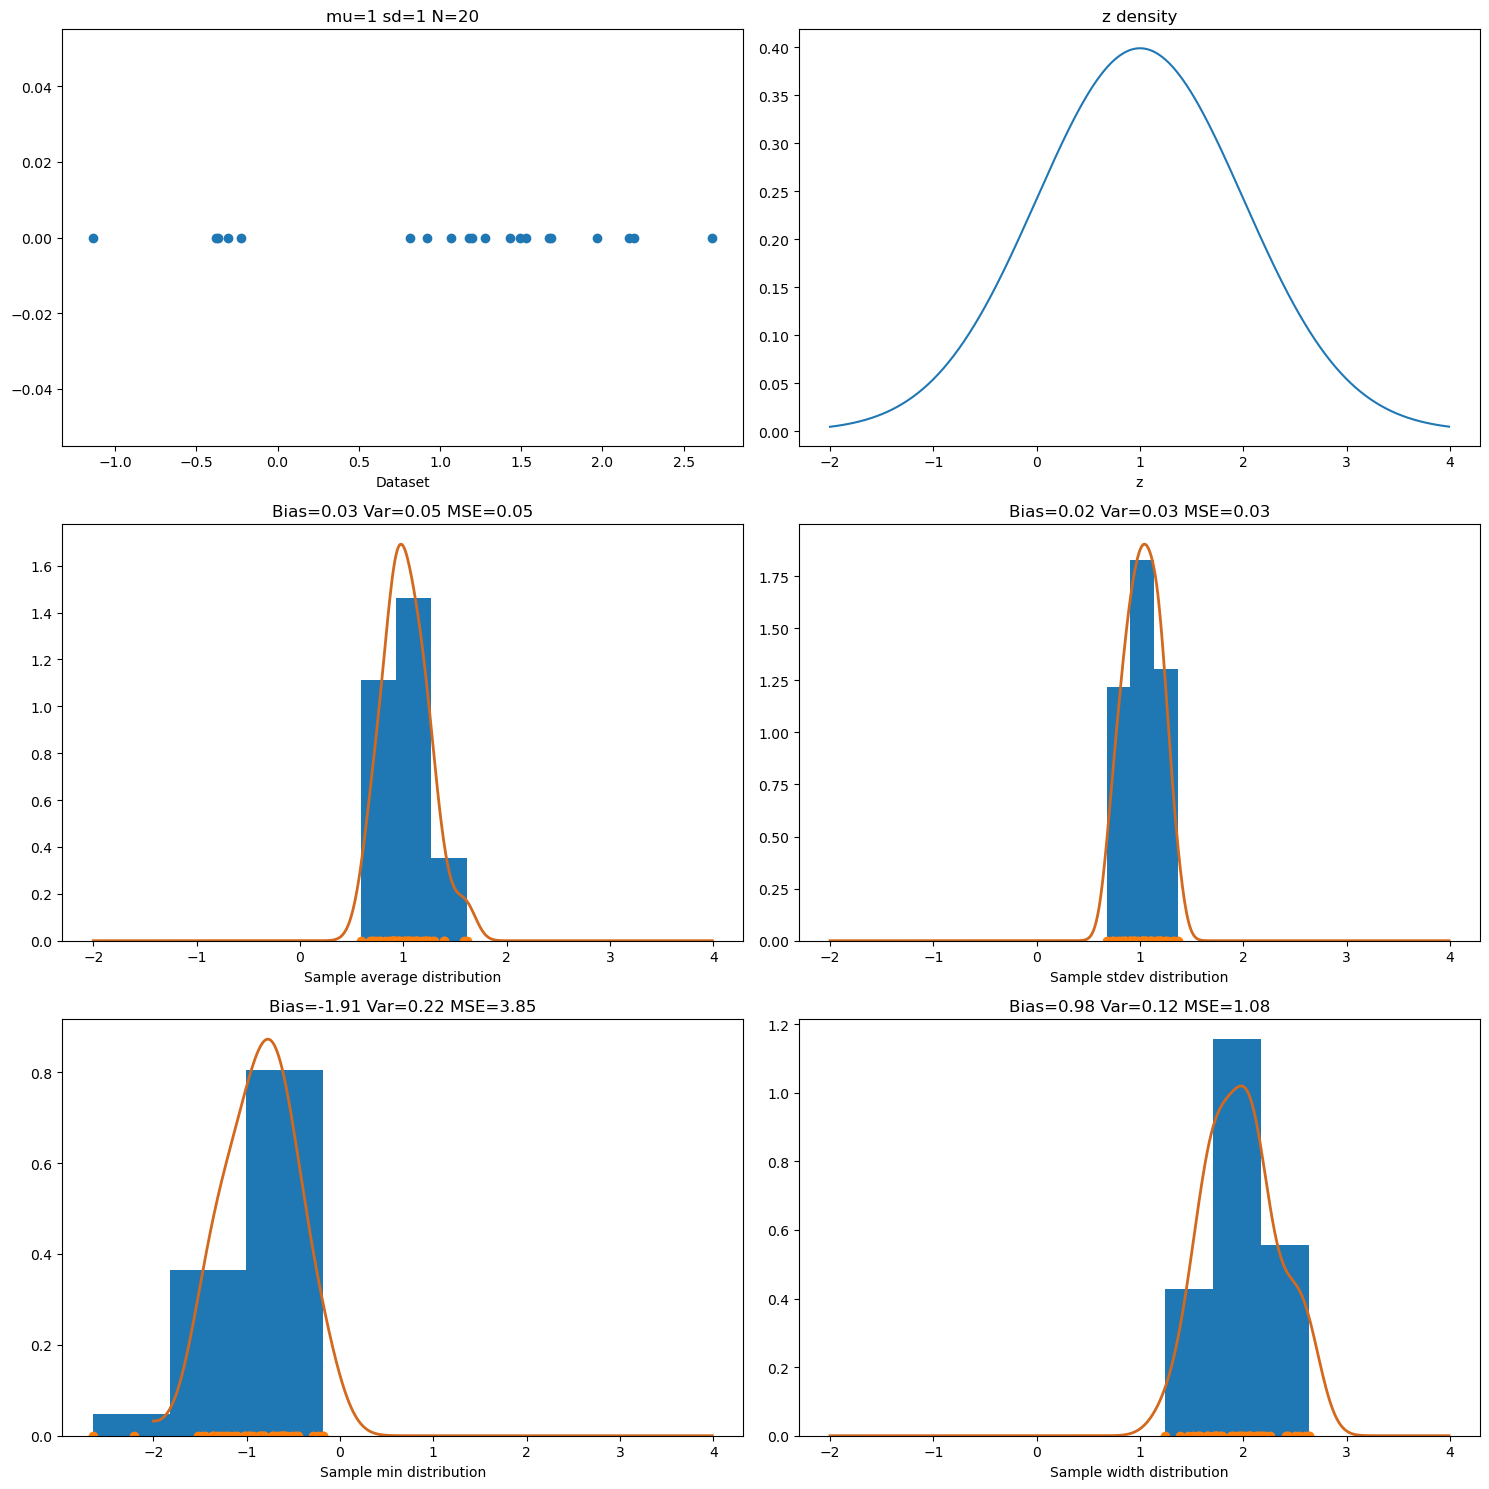

KeyboardInterrupt: Interrupted by user

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gaussian_kde

R = 10000

muz = 1
sdz = 1
N = 20
muhat = []
sdhat = []
muhat2 = []
sdhat2 = []

for r in range(1, R+1):
    DN = np.random.normal(muz, sdz, N)
    xaxis = np.arange(muz-3*sdz, muz+3*sdz, 0.01)
    
    plt.figure(figsize=(15, 15))
    plt.subplot(3, 2, 1)
    plt.plot(DN, np.zeros_like(DN), 'o')
    plt.title(f"mu={muz} sd={sdz} N={N}")
    plt.xlabel("Dataset")
    plt.ylabel("")
    
    plt.subplot(3, 2, 2)
    plt.plot(xaxis, norm.pdf(xaxis, muz, sdz))
    plt.title("z density")
    plt.xlabel("z")
    
    muhat.append(np.mean(DN))
    sdhat.append(np.std(DN, ddof=1))
    muhat2.append(np.min(DN))
    sdhat2.append(0.5*(np.max(DN)-np.min(DN)))
    
    if r % 10 == 0:
        br = r // 15 if r > 30 else r // 2
        
        plt.subplot(3, 2, 3)
        plt.hist(muhat, bins=br, density=True)
        plt.title(f"Bias={np.mean(muhat)-muz:.2f} Var={np.var(muhat):.2f} MSE={np.mean((np.array(muhat)-muz)**2):.2f}")
        plt.xlabel("Sample average distribution")
        kde = gaussian_kde(muhat)
        plt.plot(xaxis, kde(xaxis), linewidth=2, color='chocolate')
        plt.plot(muhat, np.zeros_like(muhat), 'o')
        
        plt.subplot(3, 2, 4)
        plt.hist(sdhat, bins=br, density=True)
        plt.title(f"Bias={np.mean(sdhat)-sdz:.2f} Var={np.var(sdhat):.2f} MSE={np.mean((np.array(sdhat)-sdz)**2):.2f}")
        plt.xlabel("Sample stdev distribution")
        kde = gaussian_kde(sdhat)
        plt.plot(xaxis, kde(xaxis), linewidth=2, color='chocolate')
        plt.plot(sdhat, np.zeros_like(sdhat), 'o')
        
        plt.subplot(3, 2, 5)
        plt.hist(muhat2, bins=br, density=True)
        plt.title(f"Bias={np.mean(muhat2)-muz:.2f} Var={np.var(muhat2):.2f} MSE={np.mean((np.array(muhat2)-muz)**2):.2f}")
        plt.xlabel("Sample min distribution")
        kde = gaussian_kde(muhat2)
        plt.plot(xaxis, kde(xaxis), linewidth=2, color='chocolate')
        plt.plot(muhat2, np.zeros_like(muhat2), 'o')
        
        plt.subplot(3, 2, 6)
        plt.hist(sdhat2, bins=br, density=True)
        plt.title(f"Bias={np.mean(sdhat2)-sdz:.2f} Var={np.var(sdhat2):.2f} MSE={np.mean((np.array(sdhat2)-sdz)**2):.2f}")
        plt.xlabel("Sample width distribution")
        kde = gaussian_kde(sdhat2)
        plt.plot(xaxis, kde(xaxis), linewidth=2, color='chocolate')
        plt.plot(sdhat2, np.zeros_like(sdhat2), 'o')
        
        plt.tight_layout()
        plt.show()
        
        input(f"r={r} Make more runs...")



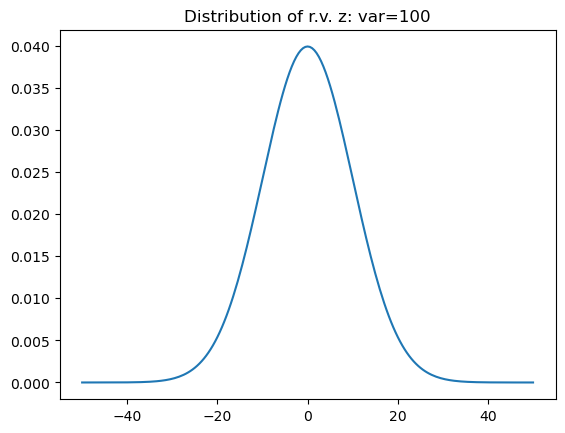

MSE=9.86
BIAS^2+VARIANCE=9.86


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 10
mu = 0
sdev = 10
R = 10000

I = np.arange(-50, 50.5, 0.5)
p = norm.pdf(I, loc=mu, scale=sdev)
plt.plot(I, p)
plt.title(f"Distribution of r.v. z: var={sdev**2}")
plt.show()

mu_hat = np.zeros((R, 1))
for r in range(R):
    D = np.random.normal(loc=mu, scale=sdev, size=N)
    mu_hat[r, 0] = np.mean(D)

err = mu_hat - mu

MSE = np.mean(err**2)
BIAS = np.mean(mu_hat) - mu
VARIANCE = np.var(mu_hat)

print(f"MSE={MSE:.2f}")
print(f"BIAS^2+VARIANCE={BIAS**2 + VARIANCE:.2f}")


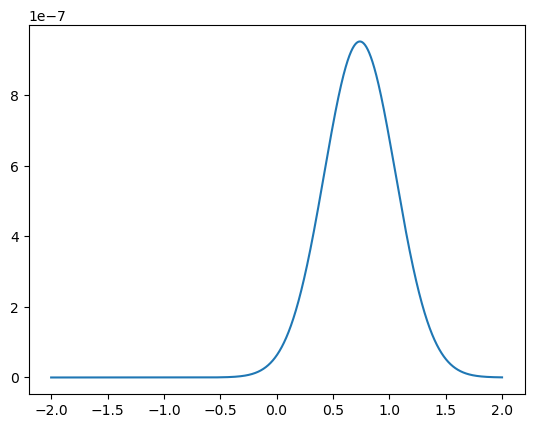

Sample average = 0.738023, arg max L = 0.738000


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(0)
N = 10
DN = np.random.normal(0, 1, N)

Theta = np.arange(-2, 2, 0.001)
L = np.ones(len(Theta))

for ith in range(len(Theta)):
    for i in range(N):
        L[ith] *= norm.pdf(DN[i], Theta[ith], 1)

plt.plot(Theta, L)
plt.show()

print(f"Sample average = {np.mean(DN):.6f}, arg max L = {Theta[np.argmax(L)]:.6f}")

